## Plots from X-ray absorption calculations using ORCA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.colors import  ListedColormap
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math

____________________________

In [4]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [5]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

--------------

In [6]:
"""
Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


cmaps = [('Sequential (2)', ['cool', 'copper', 'winter']),
         ('Diverging',      ['coolwarm']),
         ('Miscellaneous',  ['gist_rainbow', 'jet', 'brg', 'rainbow'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

#for cmap_category, cmap_list in cmaps:
#    plot_color_gradients(cmap_category, cmap_list)

#plt.show()


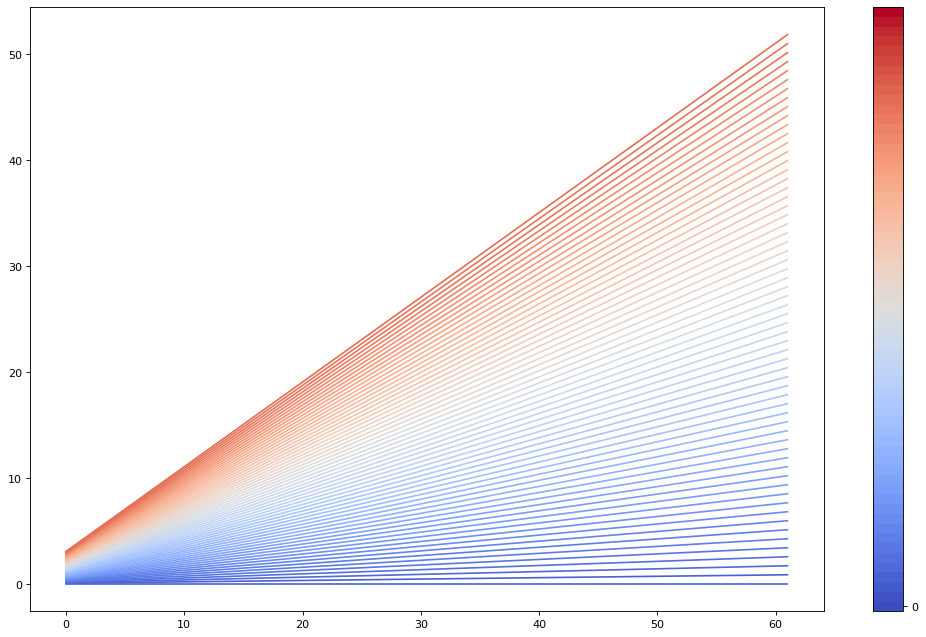

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

n = 62 # how many lines to draw or number of discrete color levels

#colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(n)))
x = np.linspace(0.05,0.85,n)
figsize=(16, 10)
dpi=80
fig = plt.figure(figsize=figsize, dpi=dpi)

cmap = plt.get_cmap("coolwarm", n)
colors = plt.get_cmap("coolwarm", n)(np.linspace(0.05,0.85,n))

for i in range(0,n):
    plt.plot(i*x, color=colors[i])#color=cmap(i))

norm= matplotlib.colors.BoundaryNorm(np.arange(0,n+1)-0.5, n)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(0,1,n))
plt.show()

In [8]:
#colorscolors_2 = plt.get_cmap("coolwarm", n)(np.linspace(0.05,0.88,n+2))
#colors_2

--------------

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

#### Pair amino acid interaction between phenylalanine (F) and tyronise (Y)

##### System of study: Phe $---$Tyr (varying inter fragment distances)

### Header test

In [9]:
fy_25 = pd.read_csv('AB_2.5A.csv', delimiter=',')
fy_25.head()
fy_25.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
fy_25

Energy  Intensity        dx        dy        dz
0     288.02   0.000000  0.000000  0.000000  0.000000
1     288.04   0.000000  0.000000  0.000000  0.000000
2     288.06   0.000000  0.000000  0.000000  0.000000
3     288.08   0.000000  0.000000  0.000000  0.000000
4     288.10   0.000000  0.000000  0.000000  0.000000
...      ...        ...       ...       ...       ...
2994  348.92  10.573084  9.978289  0.217154  0.377642
2995  348.94   9.073653  8.563040  0.186333  0.324280
2996  348.96   7.737489  7.301925  0.158874  0.276691
2997  348.98   6.556246  6.187057  0.134602  0.234586
2998  349.00   5.520109  5.209167  0.113315  0.197626

[2999 rows x 5 columns]

##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### F$---$Y ( $n=2.5, 2.6, ..., 3.0, ..., 11.0 \overset{\circ}{A}$  )
#### optimized at PM7

In [10]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post=".csv"
#list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)
csv_suf = [i/10 for i in list_suf]
for ii in list_suf:
    globals()['fy_%s' % str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['fy_%s' % str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
fy_43

Energy  Intensity   dx   dy   dz
0     288.02        0.0  0.0  0.0  0.0
1     288.04        0.0  0.0  0.0  0.0
2     288.06        0.0  0.0  0.0  0.0
3     288.08        0.0  0.0  0.0  0.0
4     288.10        0.0  0.0  0.0  0.0
...      ...        ...  ...  ...  ...
2994  348.92        0.0  0.0  0.0  0.0
2995  348.94        0.0  0.0  0.0  0.0
2996  348.96        0.0  0.0  0.0  0.0
2997  348.98        0.0  0.0  0.0  0.0
2998  349.00        0.0  0.0  0.0  0.0

[2999 rows x 5 columns]

In [11]:
list_suf_resume = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\
                   40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#list_suf_1 = [30, 35, 40, 45, 50, 55]
#list_suf_2 = [30, 35, 40, 45, 50, 55, 60, 65]

##### Raw spectra

In [12]:
def plot_xray(global_name, list_suf, x_arg, y_arg, label, xlmt=False, xmin=288, xmax=310, \
              scalec=False, ref_list=list_suf, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected   
    if scalec:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
        
    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
                
    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()
    

In [13]:
def plot_alot_xray(global_name, list_suf, x_arg, y_arg, xlmt=False, xmin=288, xmax=310, label=None, \
              scalec=False, ref_list=list_suf, plotsvg=False, nameplt='figure.svg',\
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
    if label==None:
        label=[]
        label=['_nolegend_' for ii in list_suf]

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1

    cmap = plt.get_cmap("coolwarm", len(list_suf))
    norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(list_suf)),len(list_suf))
    #np.arange(0,len(list_suf)+1)-0.5, len(list_suf))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0,len(list_suf)))#np.array(list_suf)/10)#ticks=np.arange(0,len(list_suf),2))

    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    #plt.legend(loc='upper left');
    plt.show()
    if plotsvg:
        fig.savefig(nameplt, format="svg")
    

In [14]:
def plot_normal(global_name, x_arg, y_arg, label, xlmt=False, xmin=288, xmax=310, \
              scalec=False, ref_list=62, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, 62))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
        
    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=newxrange(global_name, x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name, linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    plt.xlabel('Distance')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()

In [15]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

In [16]:
def getting_max_int(df, min_r, max_r):
    """
    giving a specific range of the data, this function returns the energy when intensity is maximum
    """
    num = df[(df['Energy']<max_r) & (df['Energy']>min_r)]['Intensity'].idxmax()
    try:
        return df.iloc[num][['Energy','Intensity']]
    except IndexError:
        return pd.DataFrame({'Energy': [NaN], 'Intensity': [NaN]})
        

In [336]:
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

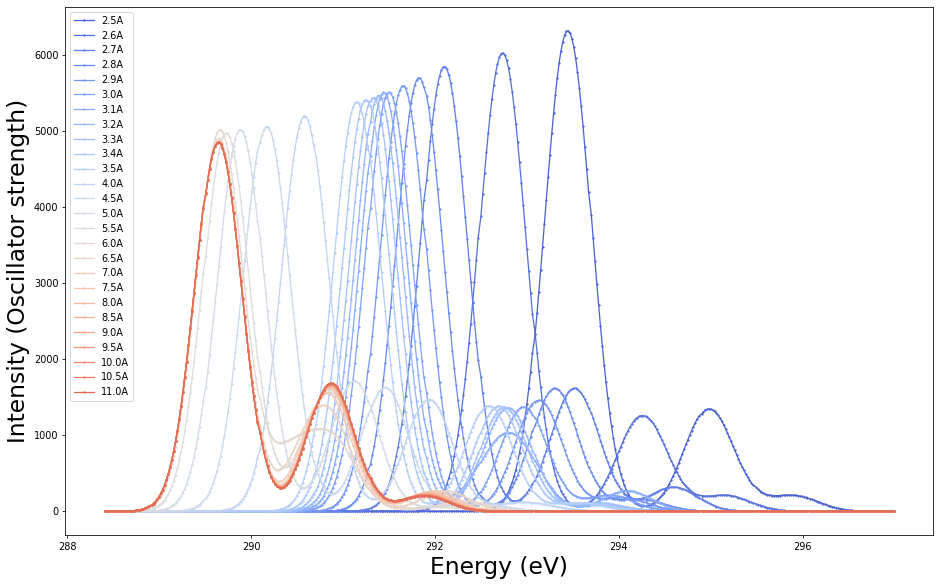

In [18]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.4, xmax=297)

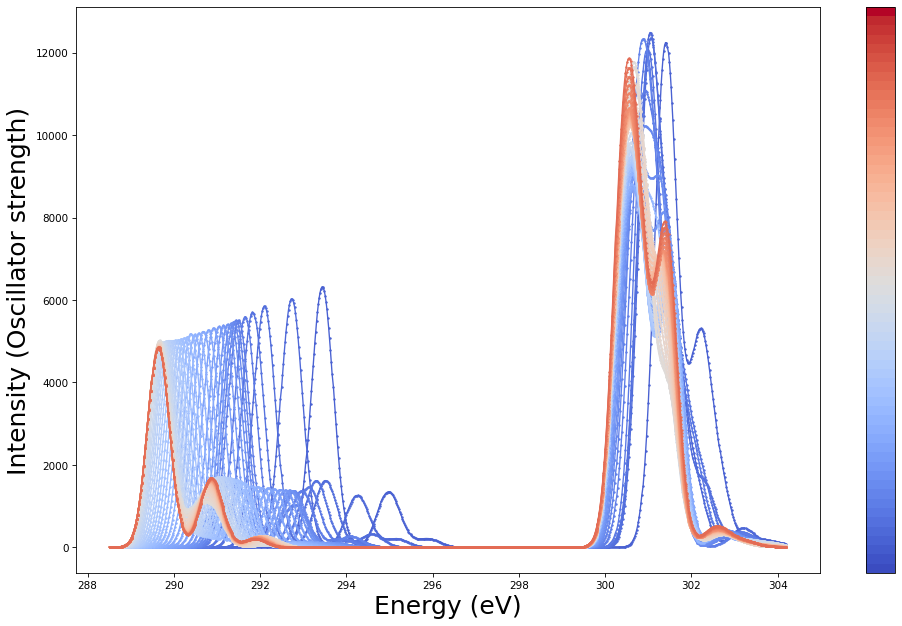

In [19]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=288.5, xmax=304.2, plotsvg=True, nameplt='total_predge.svg')

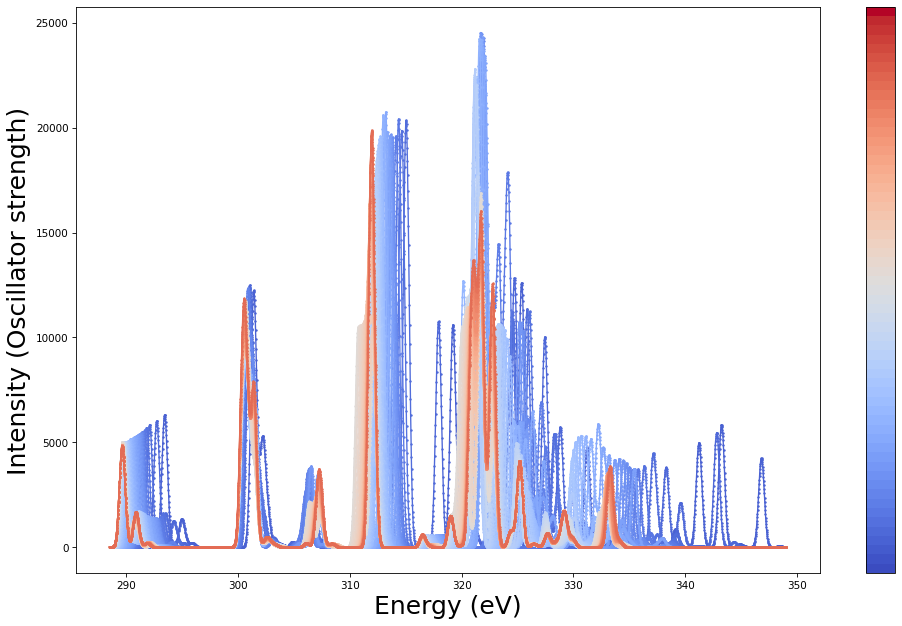

In [20]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=288.5, xmax=350, plotsvg=True, nameplt='total_xspectra1.svg')

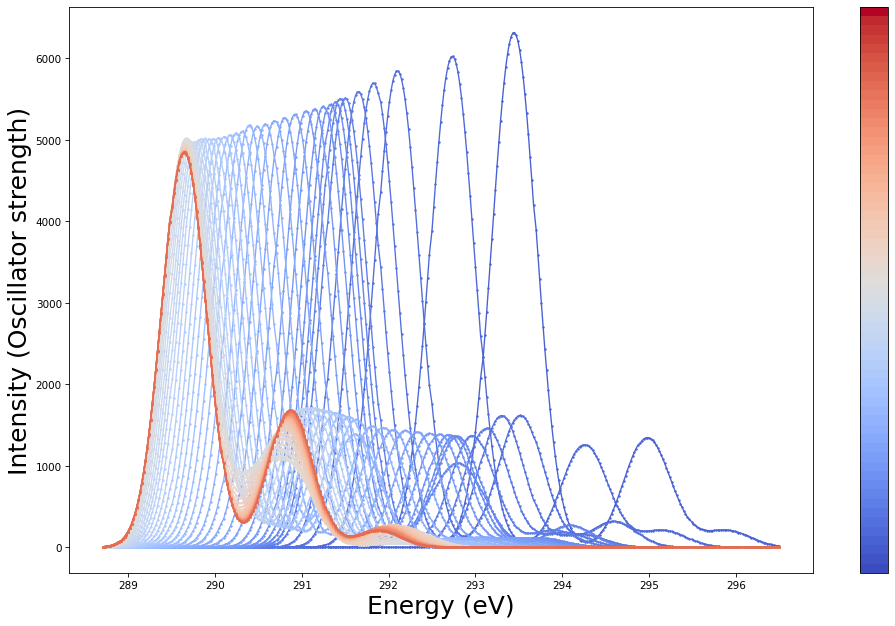

In [21]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=288.7, xmax=296.5, plotsvg=True, nameplt='total_predge_region1.svg')

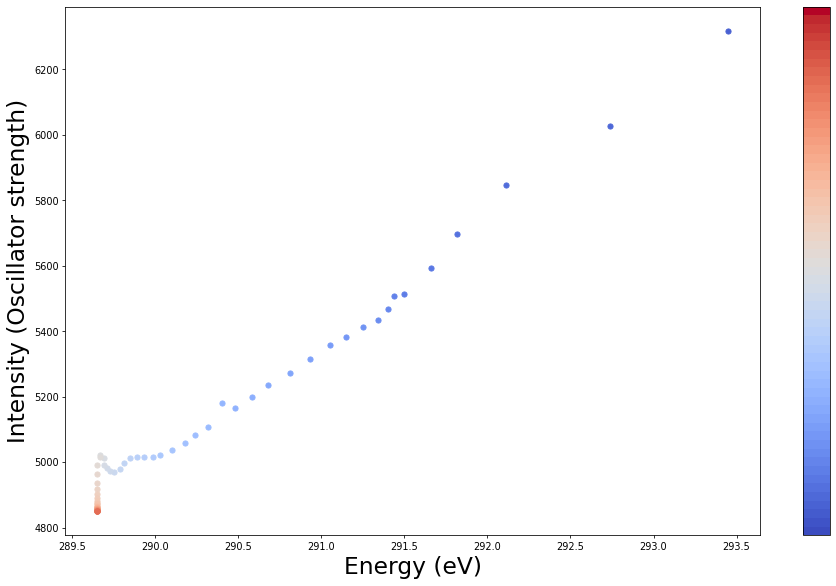

In [23]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 288.5, 296) \
               for ii in list_suf]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3,\
              plotsvg=True, nameplt='total_IvsE_predge_region1.svg')# xlmt=True, xmin=288.5, xmax=296)

In [95]:
colors[0]

array([0.28527278, 0.38012942, 0.82346855, 1.        ])

In [320]:
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

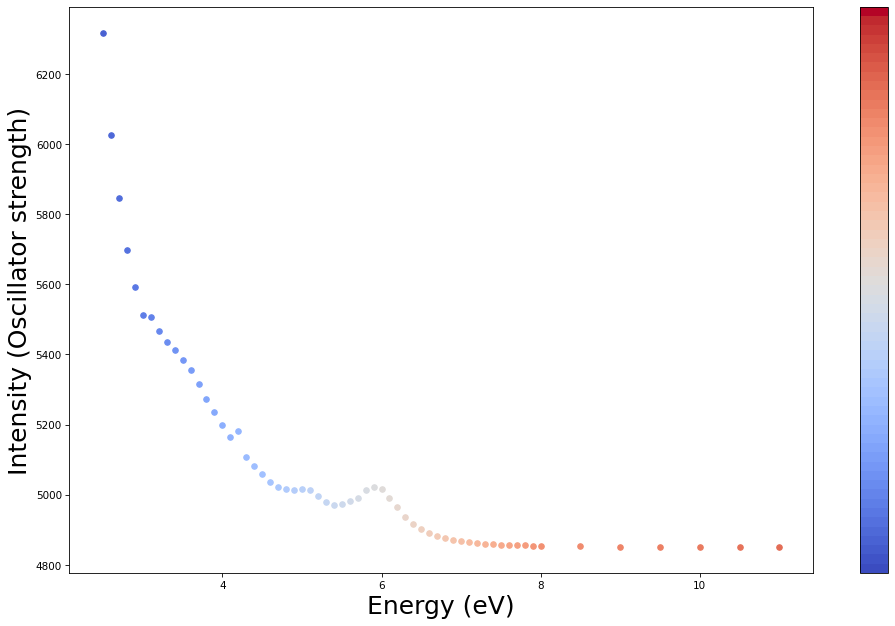

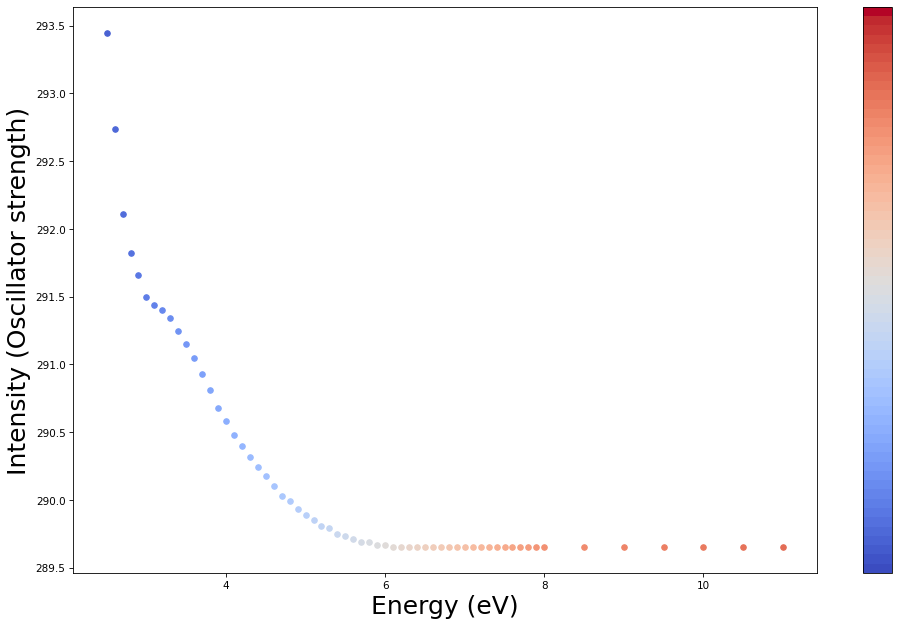

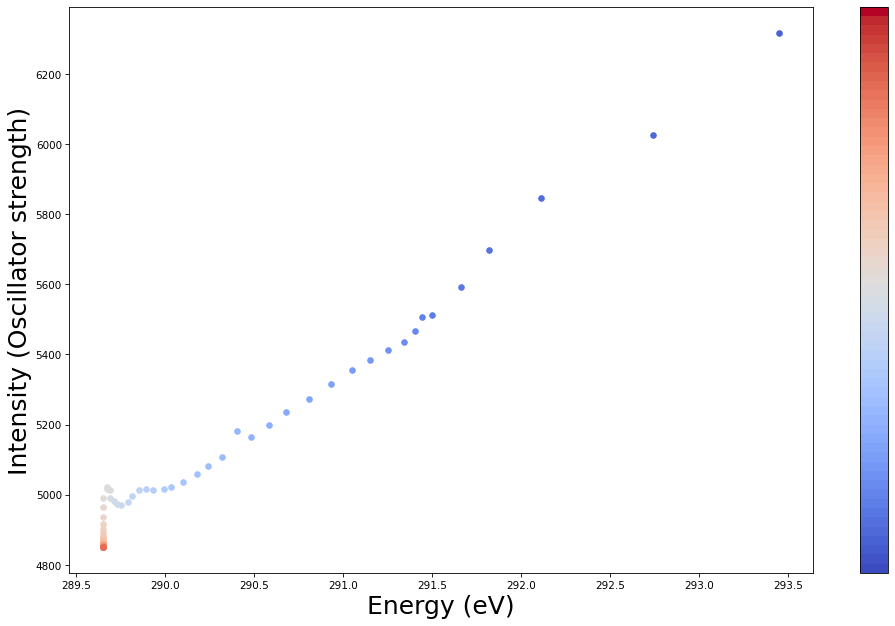

In [338]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 288.5, 296) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
  'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
 #'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
 #'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
#new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
new_df_ei = pd.DataFrame({'Intensity': [global_name_cut_1[cc]['Intensity'] \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=75, markersize=5.3,\
              plotsvg=True, nameplt='Ivsdist_predge_region1pt.svg')
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=75, markersize=5.3)
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=75, markersize=5.3)

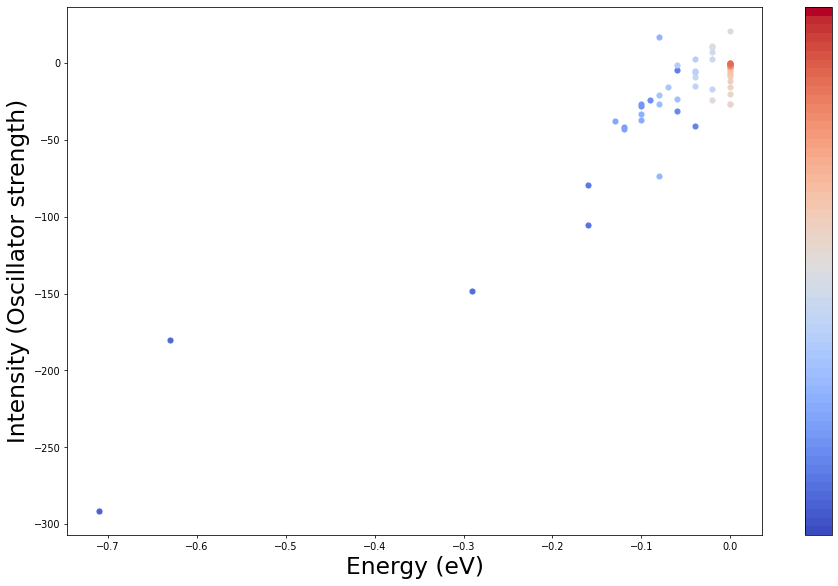

In [26]:
new_evsi = pd.DataFrame({'Energy': [global_name_cut_1[cc+1]['Energy'] - global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf)-1)], \
 'Intensity': [global_name_cut_1[cc+1]['Intensity'] - global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf)-1)]})
neww_evsi = [new_evsi.iloc[ii] for ii in range(len(list_suf)-1)]
plot_alot_xray(neww_evsi, list_suf[:-1], 'Energy', 'Intensity', dpi=70, markersize=5.3)

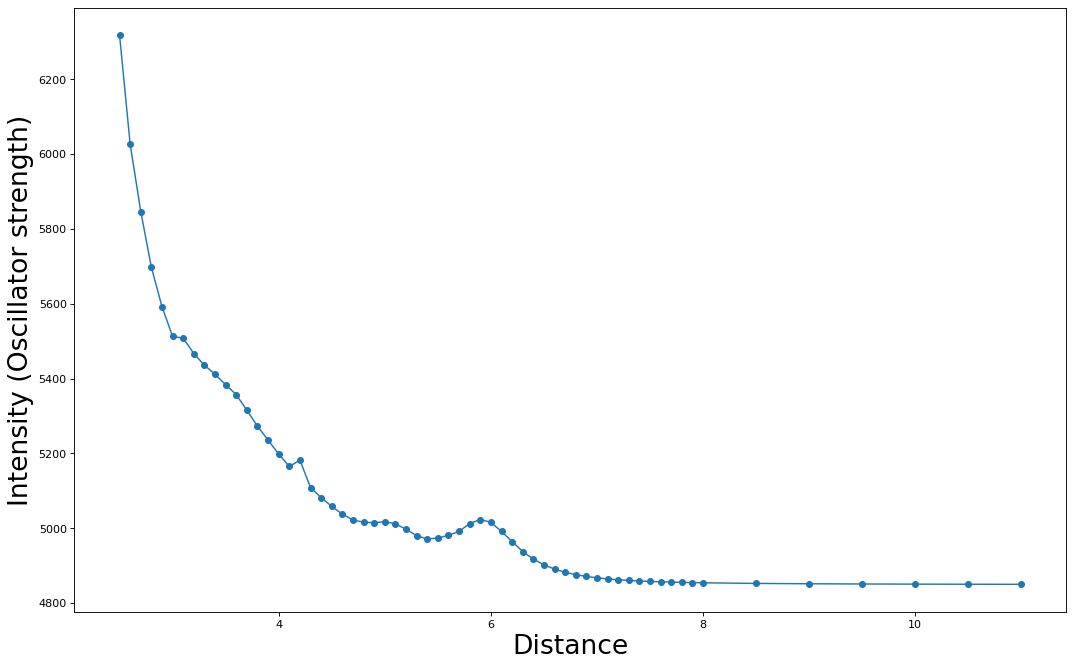

In [27]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=5.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

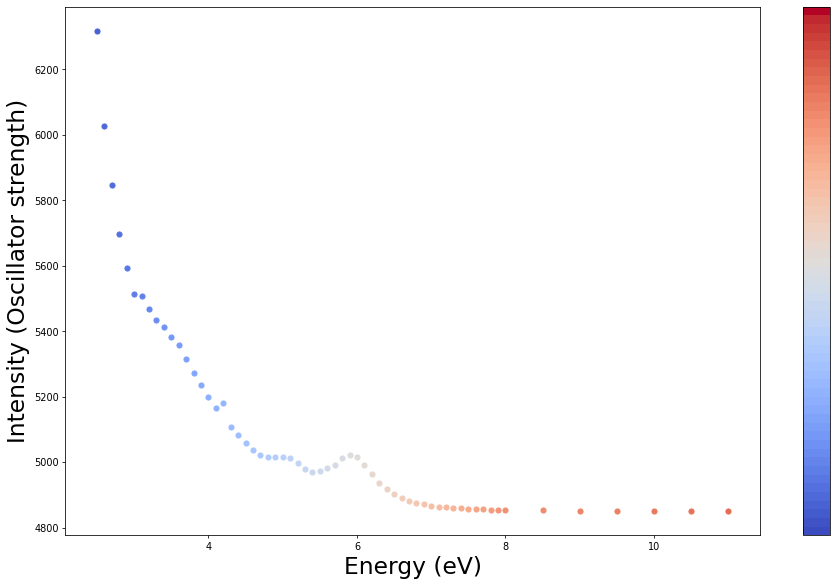

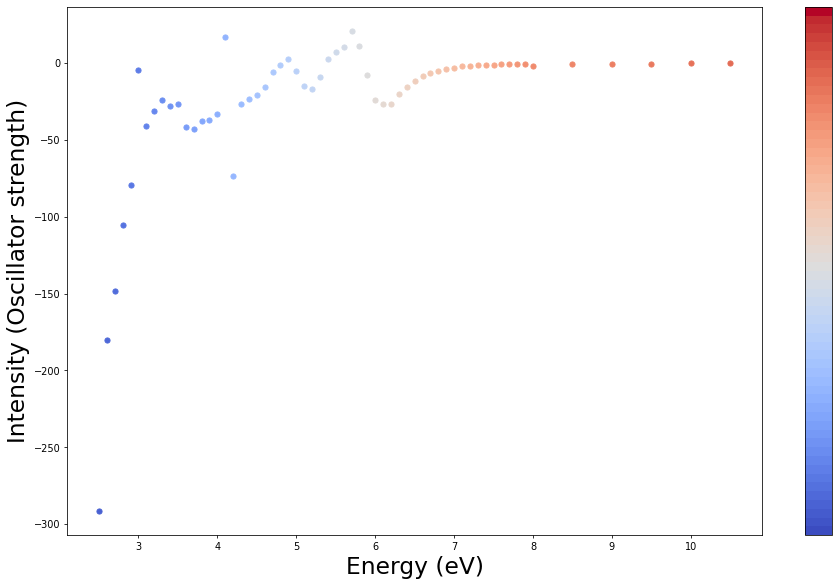

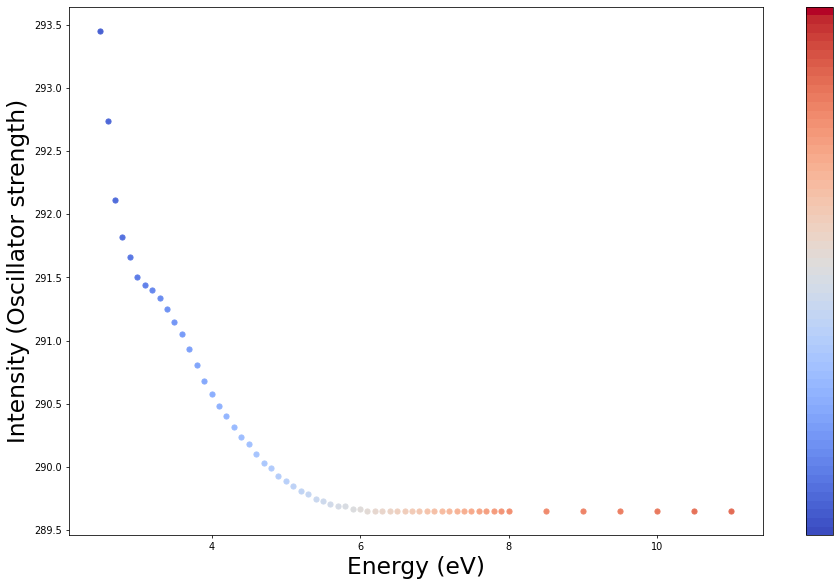

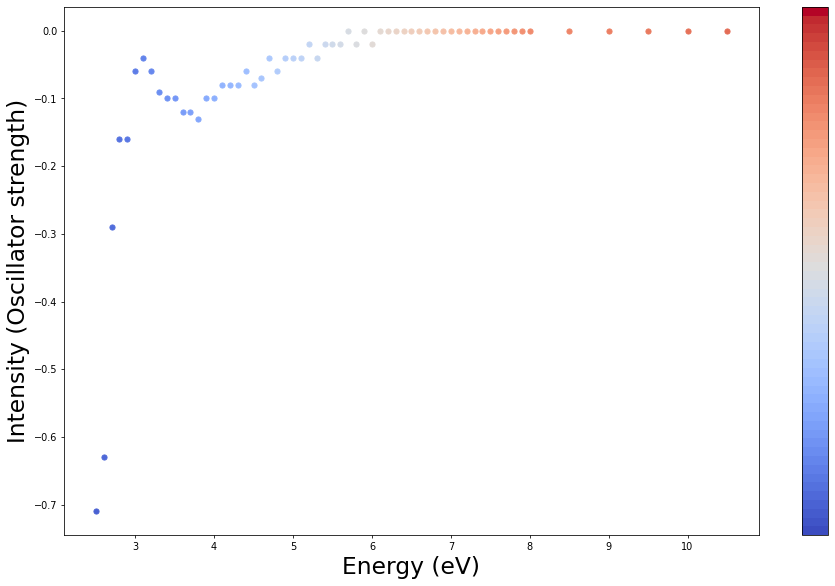

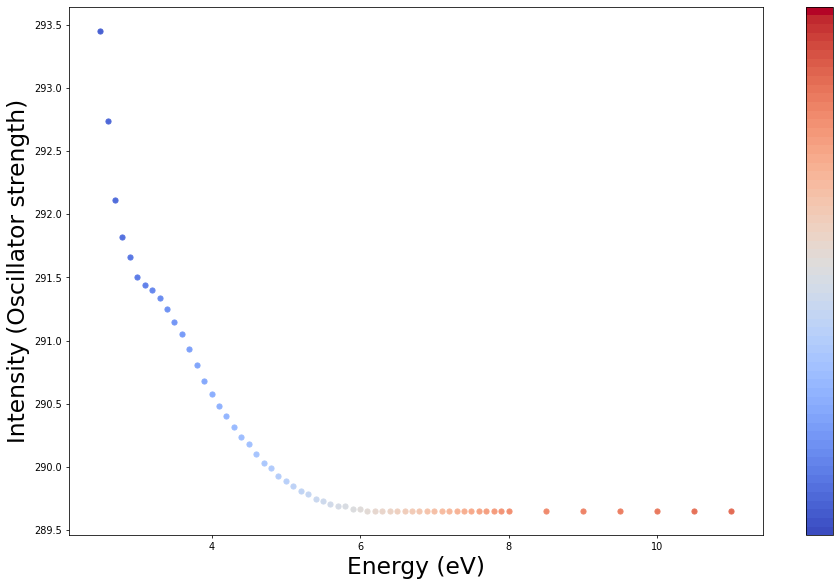

In [339]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
#new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
# 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity']-global_name_cut_1[cc]['Intensity']) \
               for cc in range(len(list_suf)-1)]})




new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
#new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
# 'Energy': [1/math.log(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one

new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Energy': [(global_name_cut_1[cc+1]['Energy']-global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf)-1)]})#favourite one

new_df_6 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy']+(1/global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

neww_df = [new_df.iloc[ii] for ii in range(len(list_suf))]
neww_df_2 = [new_df_3.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_3 = [new_df_4.iloc[ii] for ii in range(len(list_suf))]
neww_df_4 = [new_df_5.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_5 = [new_df_6.iloc[ii] for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(neww_df, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_2, list_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaI_zone1.svg')
plot_alot_xray(neww_df_3, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_4, list_suf[:-1], 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1.svg')
plot_alot_xray(neww_df_5, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
#, plotsvg=True, nameplt='total_predge_region1.svg')

### new range for draft

In [322]:
list_suf_cut = list_suf[5:42]

In [228]:
#len(new_df_cutreldr)
len(new_df_cutrel)

37

In [244]:
new_df_cutedrel.iloc[0]['Energy']

1.0

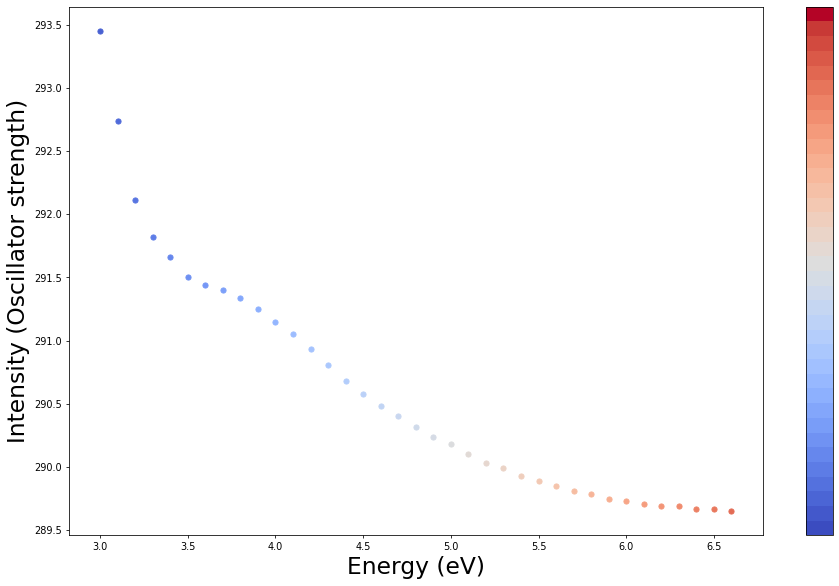

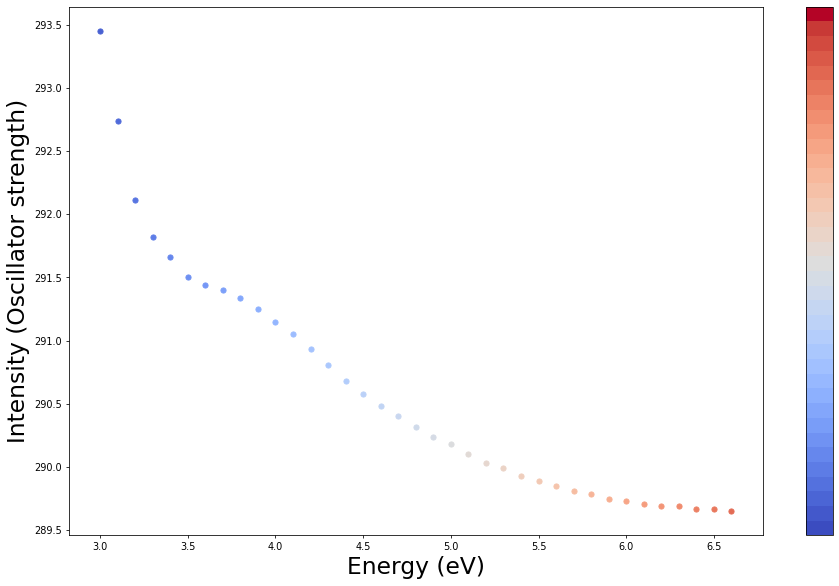

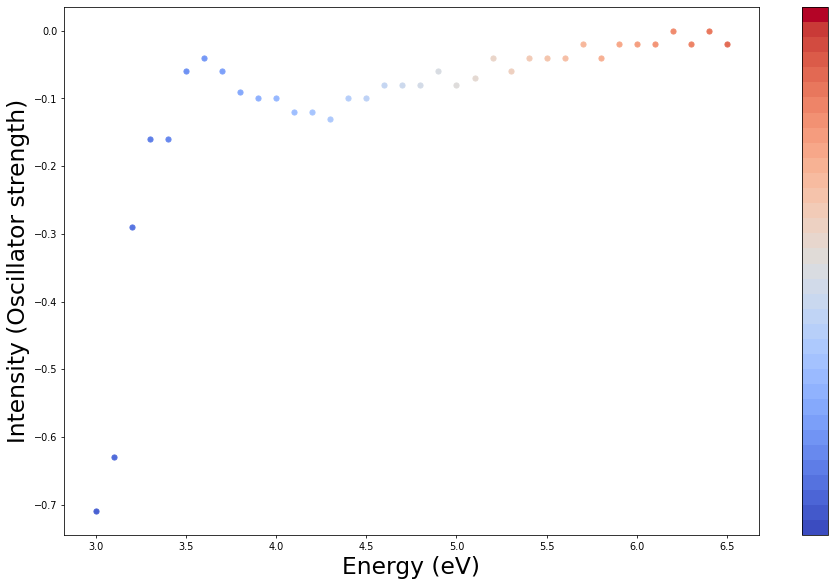

In [342]:
new_df_cutedr = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf_cut))]})
new_df_cutemod = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 #'Energy': [math.exp(-1/(new_df_cutedr.iloc[cc]['Energy'])) \
 'Energy': [(new_df_cutedr.iloc[cc]['Energy']) \
            for cc in range(len(list_suf_cut))]})
new_df_cutedelta = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut)-1)], \
 'Energy': [(new_df_cutemod.iloc[cc+1]['Energy'] - new_df_cutemod.iloc[cc]['Energy']) \
            for cc in range(len(list_suf_cut)-1)]})
neww_df_cutedr = [new_df_cutedr.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutemod = [new_df_cutemod.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutedelta = [new_df_cutedelta.iloc[ii] for ii in range(len(list_suf_cut)-1)]
plot_alot_xray(neww_df_cutedr, list_suf_cut, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutemod, list_suf_cut, 'Distance', 'Energy', dpi=70, markersize=5.3,
               plotsvg=True, nameplt='E_zone1_2.svg')
plot_alot_xray(neww_df_cutedelta, list_suf_cut[:-1], 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1_2.svg')

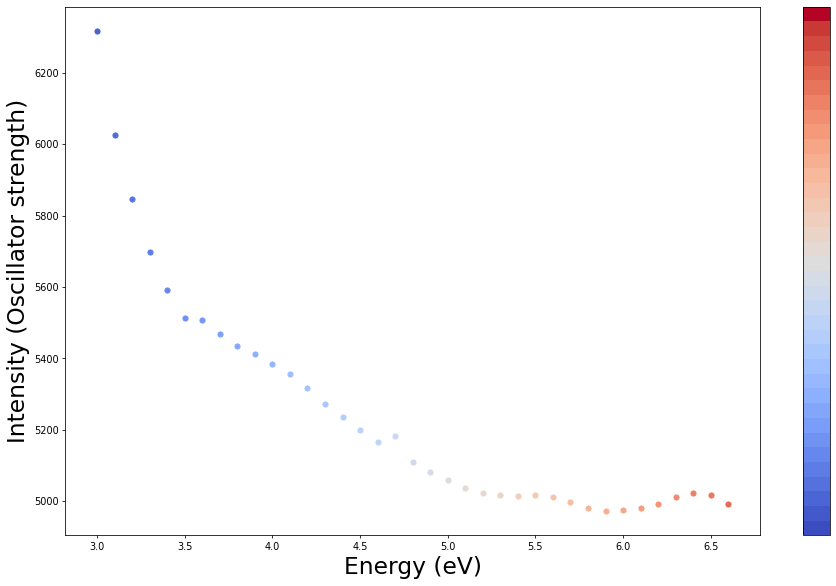

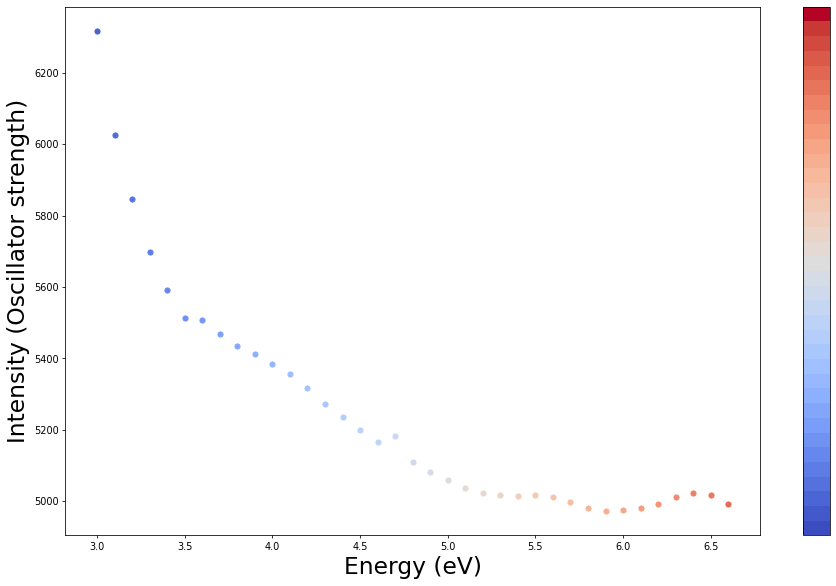

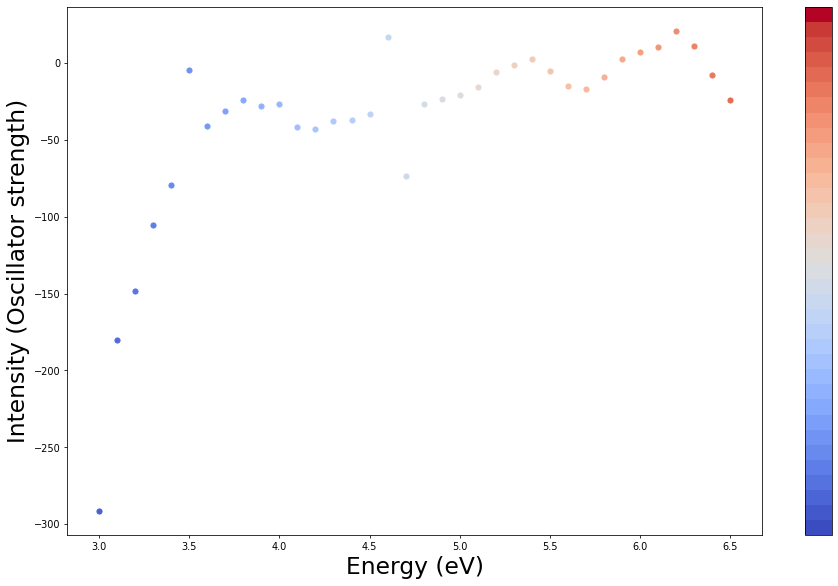

In [332]:
new_df_cutidr = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf_cut))]})
new_df_cutimod = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 #'Intensity': [math.log(new_df_cutidr.iloc[cc]['Intensity']) \
 'Intensity': [(new_df_cutidr.iloc[cc]['Intensity']) \
            for cc in range(len(list_suf_cut))]})
new_df_cutidelta = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut)-1)], \
 'Intensity': [(new_df_cutimod.iloc[cc+1]['Intensity'] - new_df_cutimod.iloc[cc]['Intensity']) \
            for cc in range(len(list_suf_cut)-1)]})
neww_df_cutidr = [new_df_cutidr.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutimod = [new_df_cutimod.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutidelta = [new_df_cutidelta.iloc[ii] for ii in range(len(list_suf_cut)-1)]
plot_alot_xray(neww_df_cutidr, list_suf_cut, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutimod, list_suf_cut, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutidelta, list_suf_cut[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1_2.svg')


4971.3822969559

In [109]:
neww_df_cut[0]

Distance        3.000000
Intensity    2644.831891
Name: 0, dtype: float64

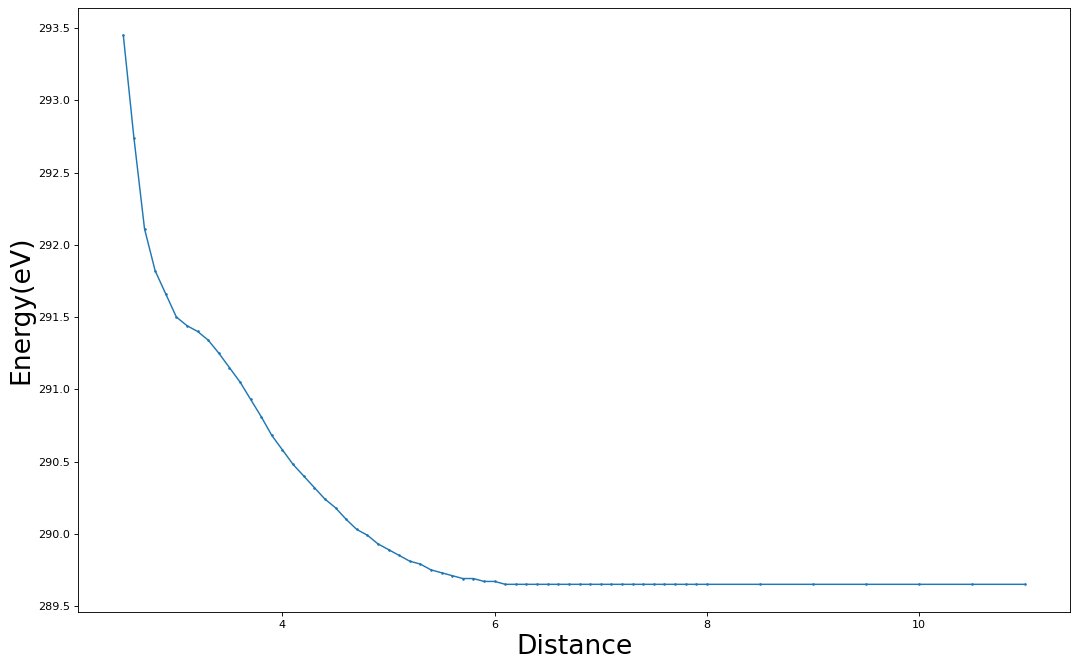

In [30]:
new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new_df_5, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new_df_4, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

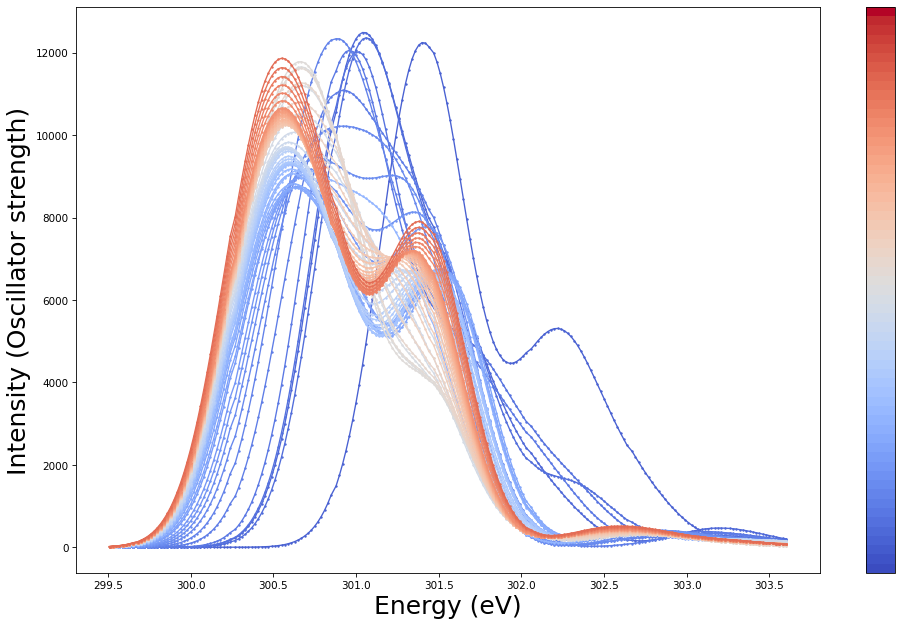

In [31]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=299.5, xmax=303.6)
#plt.savefig("total_predge_region2.svg")

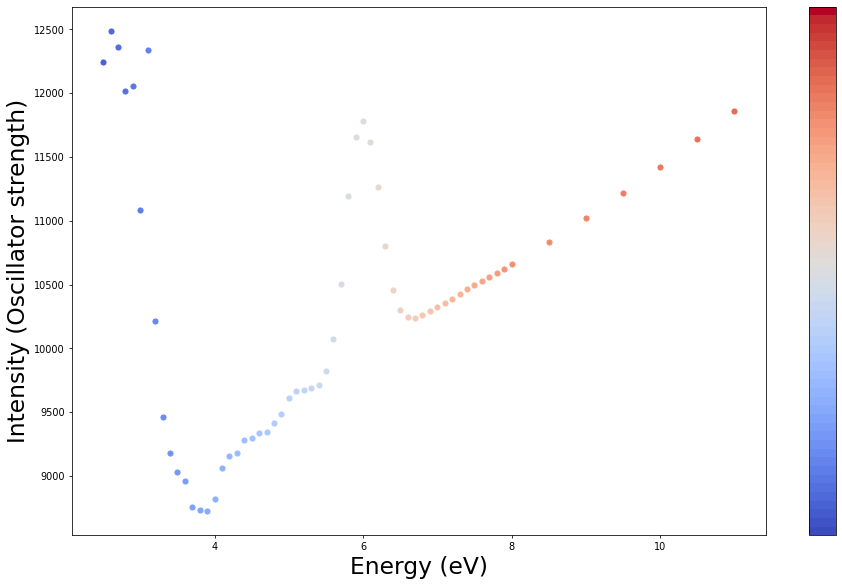

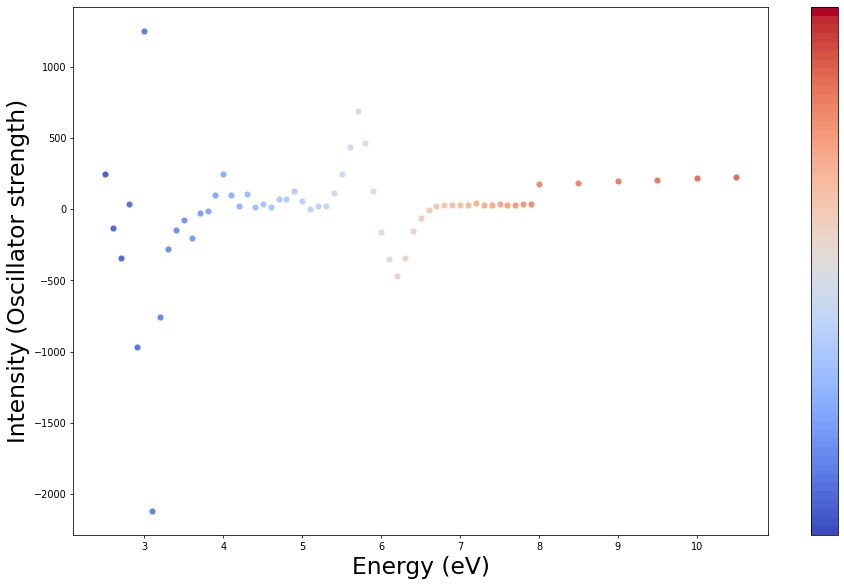

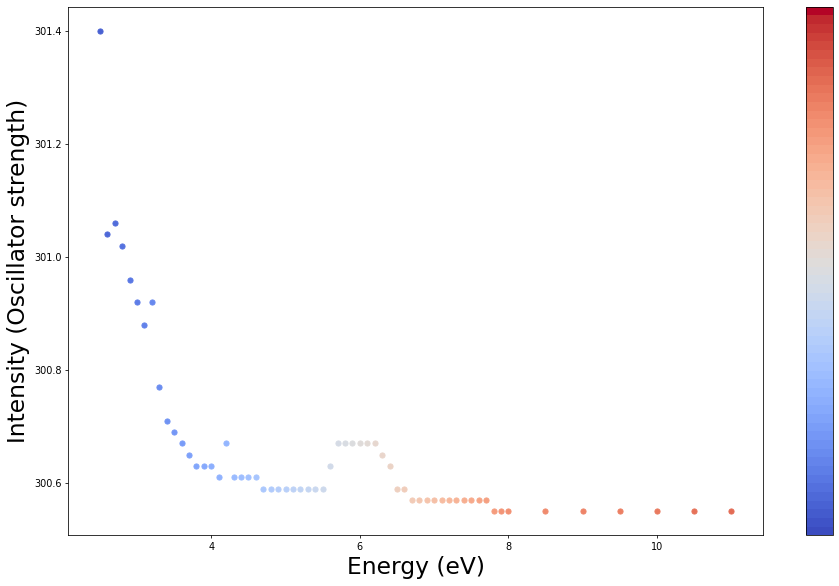

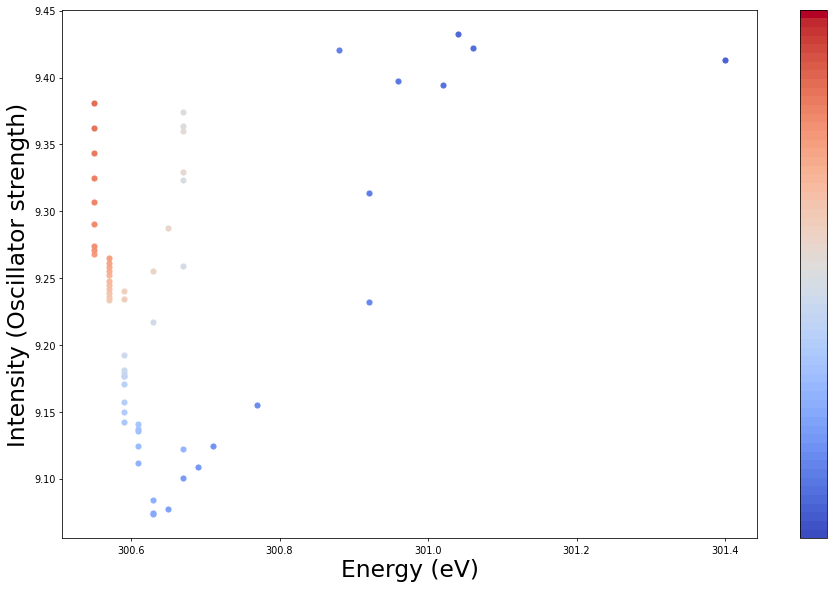

In [333]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 299.5, 303) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})

new_df_idelta = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(new_df_i.iloc[cc+1]['Intensity']-new_df_i.iloc[cc]['Intensity']) for cc in range(len(list_suf)-1)]})
# 'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
# 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_idelta = [new_df_idelta.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)#,\
             # plotsvg=True, nameplt='Ivsdist_predge_region2pt.svg')
plot_alot_xray(neww_df_idelta, list_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaI_zone2.svg')
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='nodeltaE_zone2.svg')
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3)


In [311]:
new_suf=list_suf[5:42]
#new_df_i

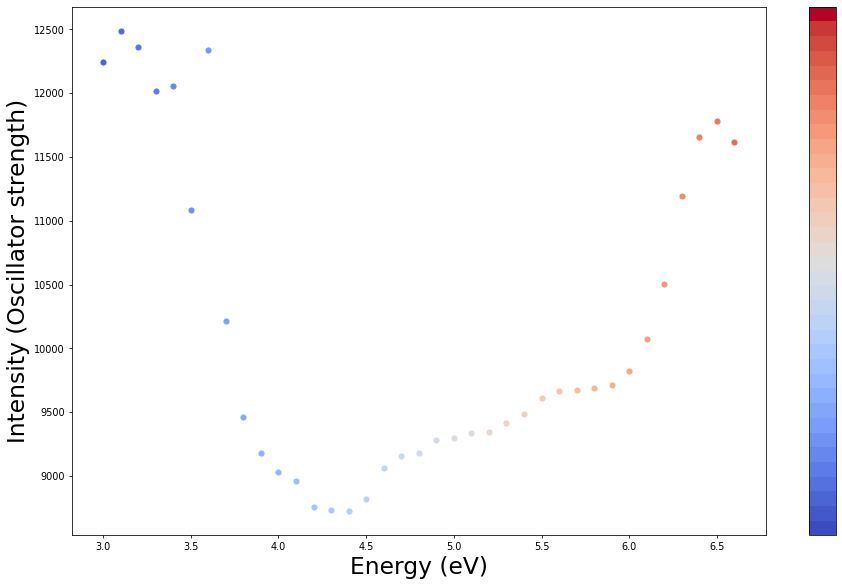

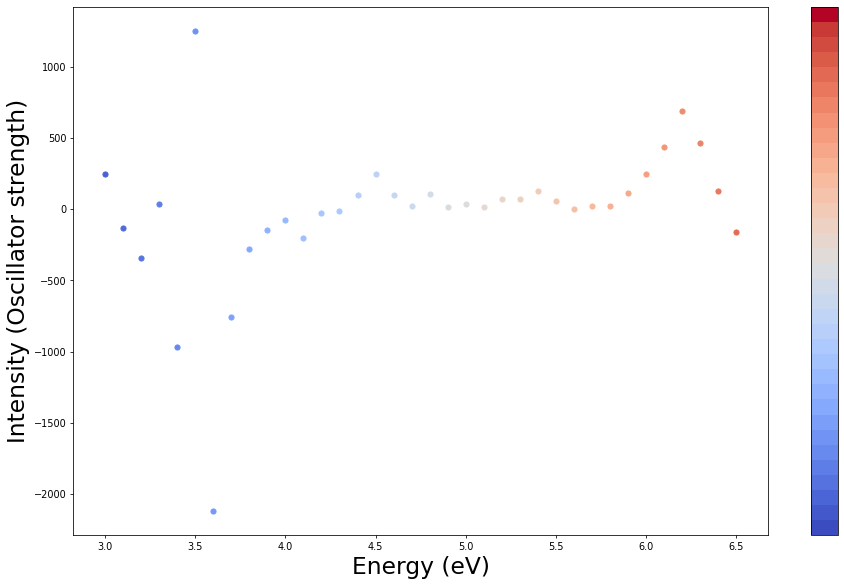

In [316]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 299.5, 303) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(new_suf))]})

new_df_idelta = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf)-1)], \
 'Intensity': [(new_df_i.iloc[cc+1]['Intensity']-new_df_i.iloc[cc]['Intensity']) \
               for cc in range(len(new_suf)-1)]})
# 'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(new_suf))]})
# 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(new_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(new_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(new_suf))]
neww_df_idelta = [new_df_idelta.iloc[ii] for ii in range(len(new_suf)-1)]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(new_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(new_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, new_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)#,\
             # plotsvg=True, nameplt='Ivsdist_predge_region2pt.svg')
plot_alot_xray(neww_df_idelta, new_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3)


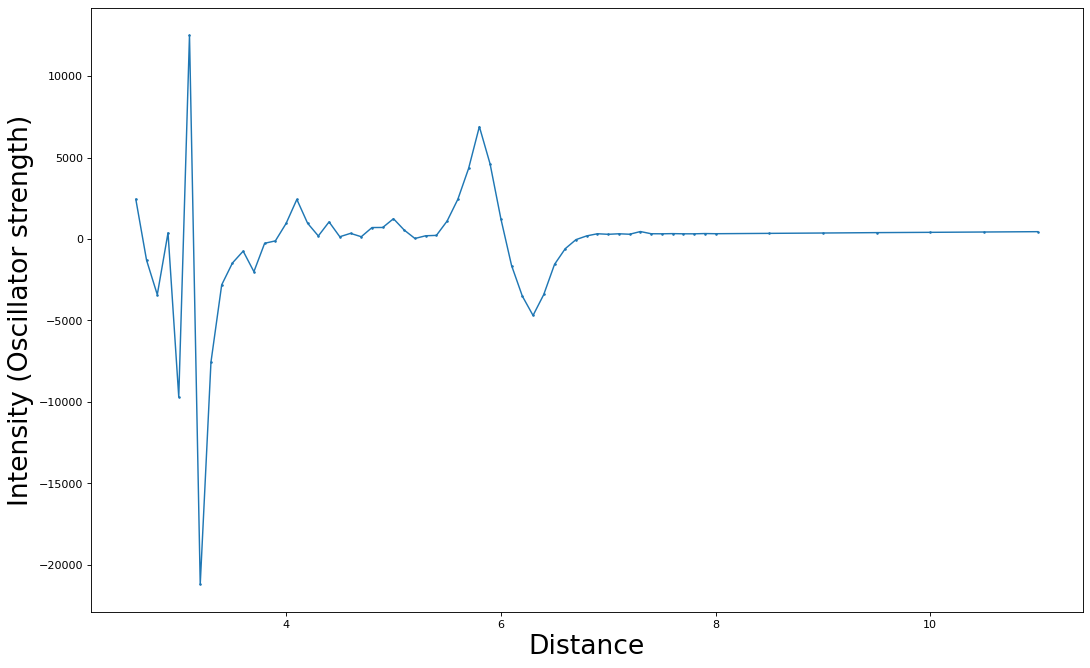

In [33]:
new2_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new2_df_2 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity'] - \
                global_name_cut_1[cc]['Intensity'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
n1.plot(x_arg, y_arg, data=new2_df_2, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
#n1.plot(x_arg, y_arg, data=new2_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

In [34]:
new2_df_2

Distance    Intensity
0        2.6  2444.479400
1        2.7 -1295.974282
2        2.8 -3414.860647
3        2.9   382.175804
4        3.0 -9695.768360
..       ...          ...
56       9.0   370.375828
57       9.5   394.631232
58      10.0   412.052838
59      10.5   432.294806
60      11.0   453.344050

[61 rows x 2 columns]

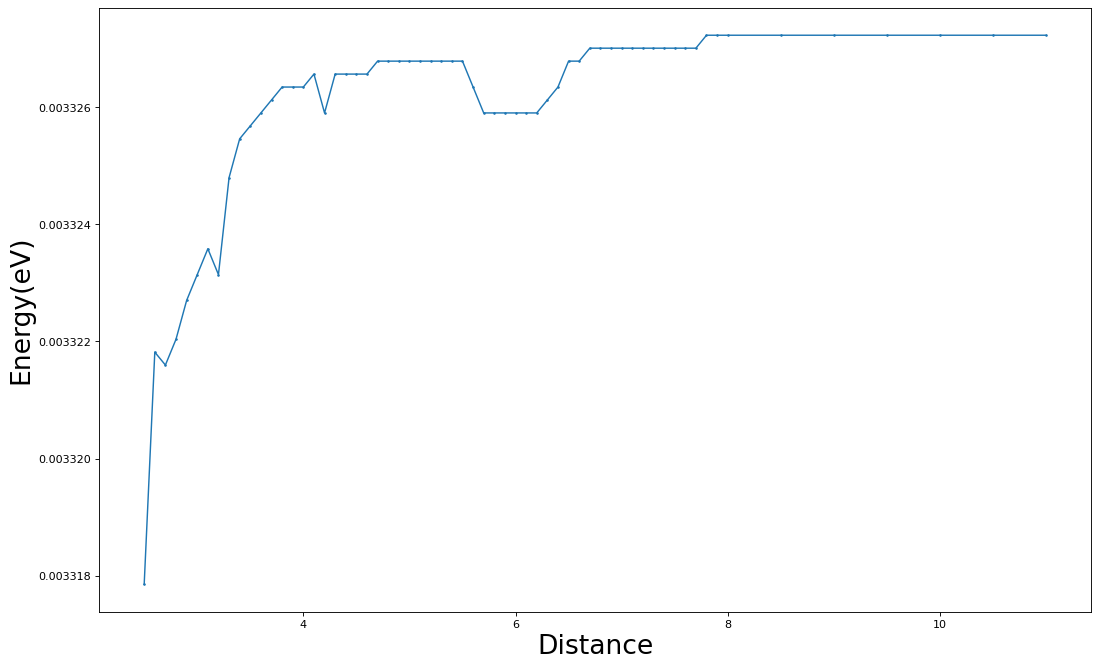

In [35]:
new2_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new2_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new2_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new2_df_4, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

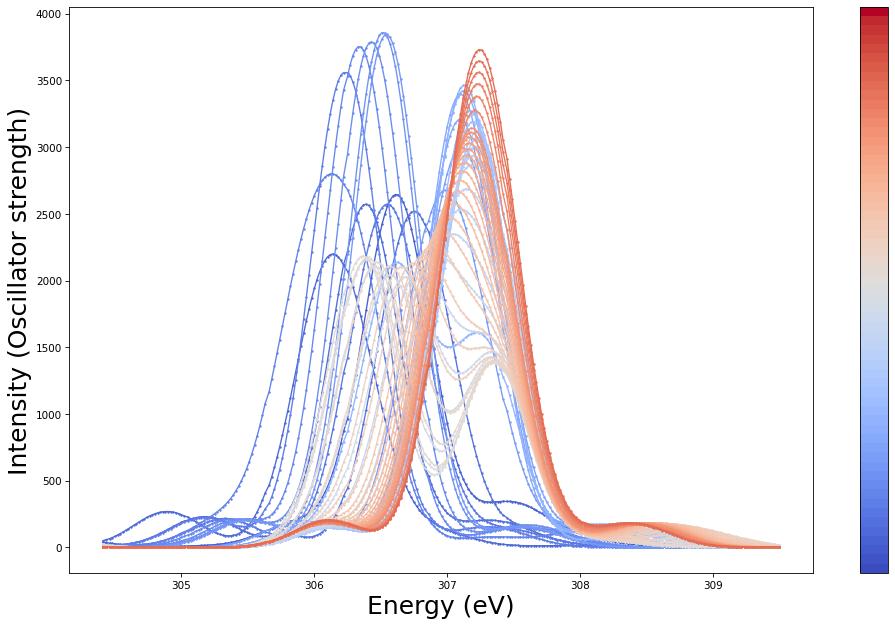

In [36]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=304.4, xmax=309.5)

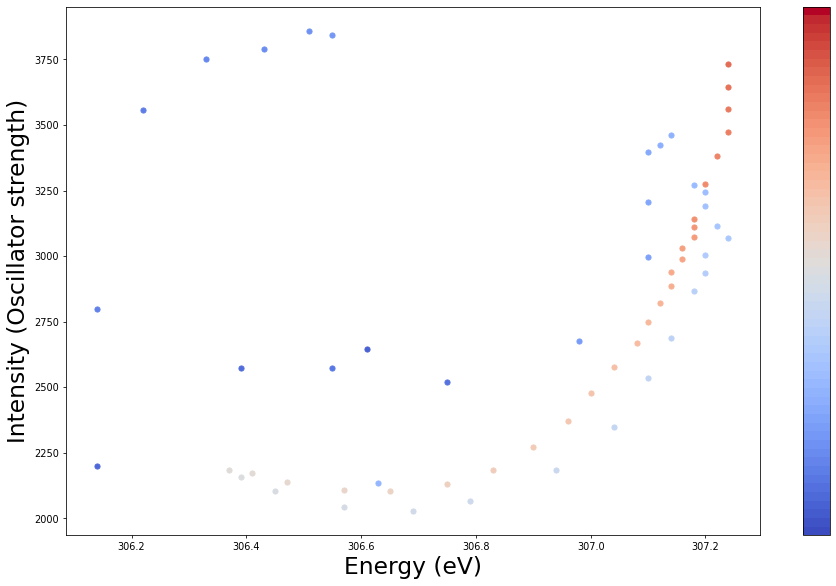

In [37]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 305, 309) \
               for ii in list_suf]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3\
              )# xlmt=True, xmin=288.5, xmax=296)

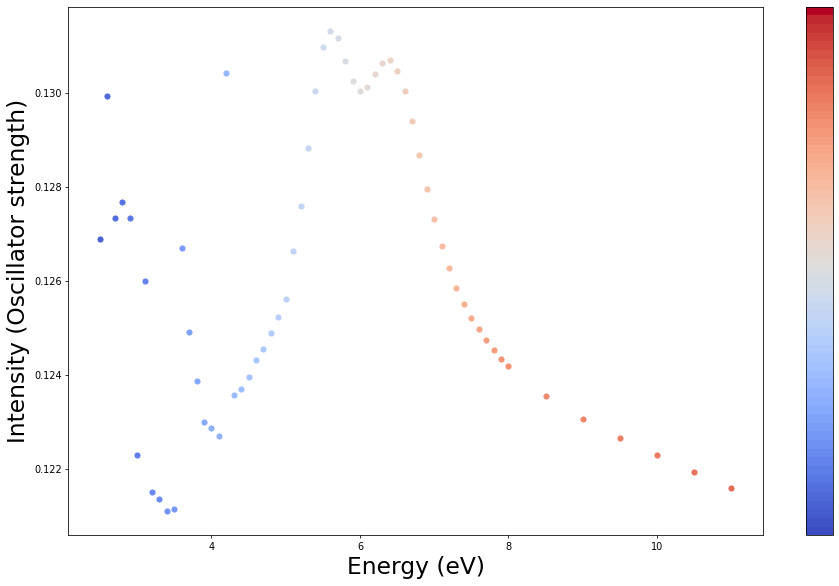

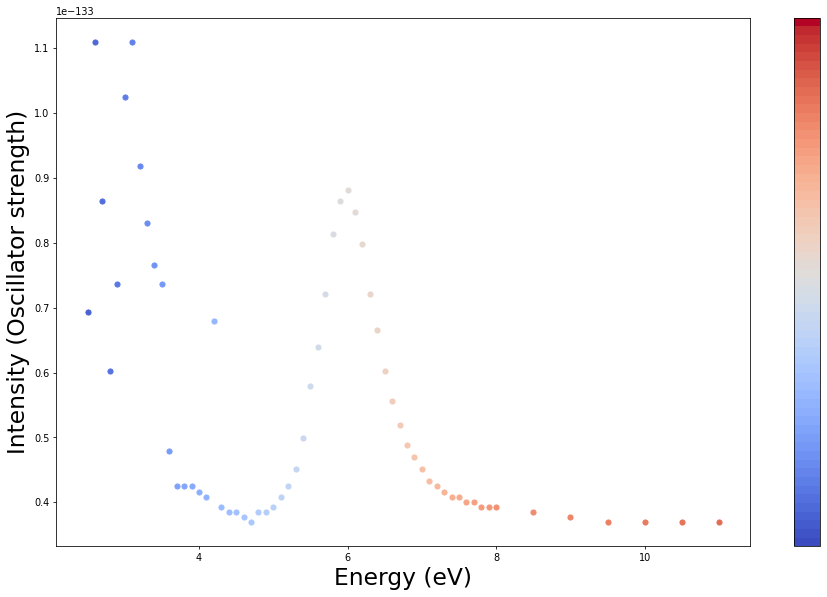

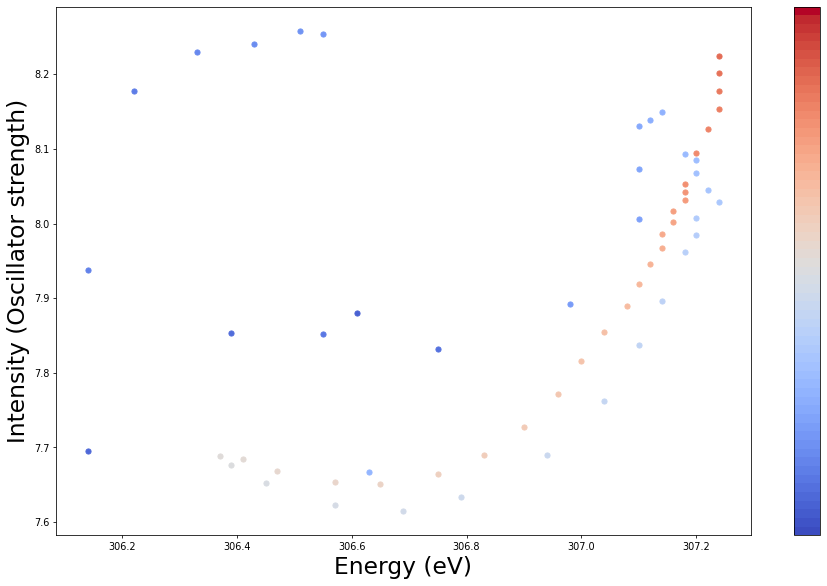

In [38]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 305, 309) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})

new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3)

#label_name = [str(ii/10)+'A' for ii in list_suf]
#plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=75, markersize=5.3\
#              )# xlmt=True, xmin=288.5, xmax=296)

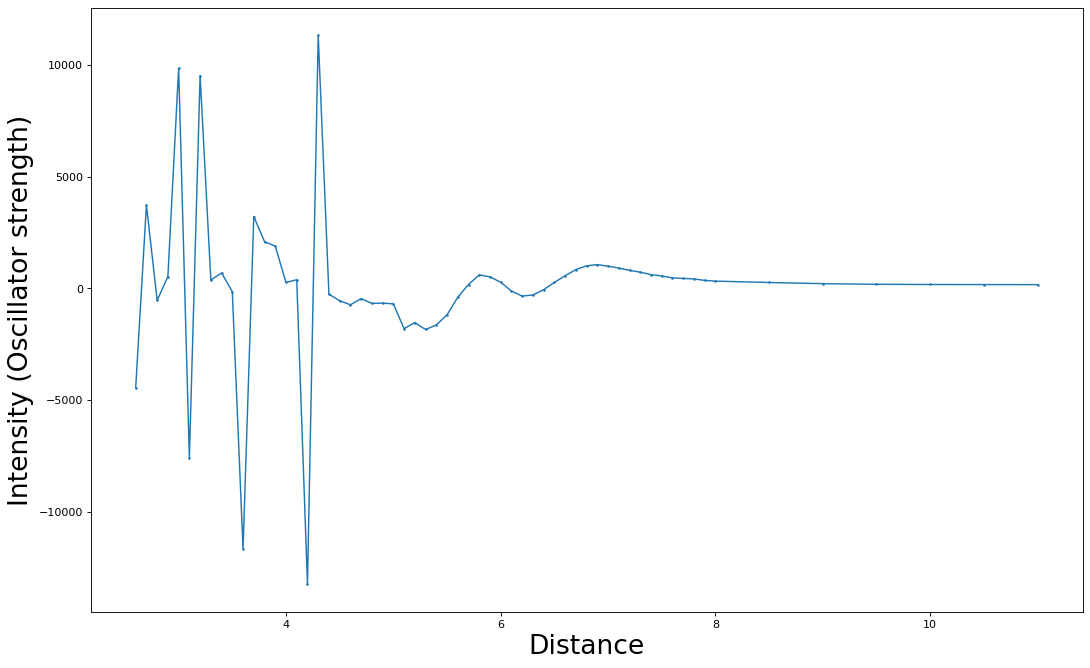

In [39]:
new3_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new3_df_2 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity'] - \
                global_name_cut_1[cc]['Intensity'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
n1.plot(x_arg, y_arg, data=new3_df_2, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
#n1.plot(x_arg, y_arg, data=new3_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

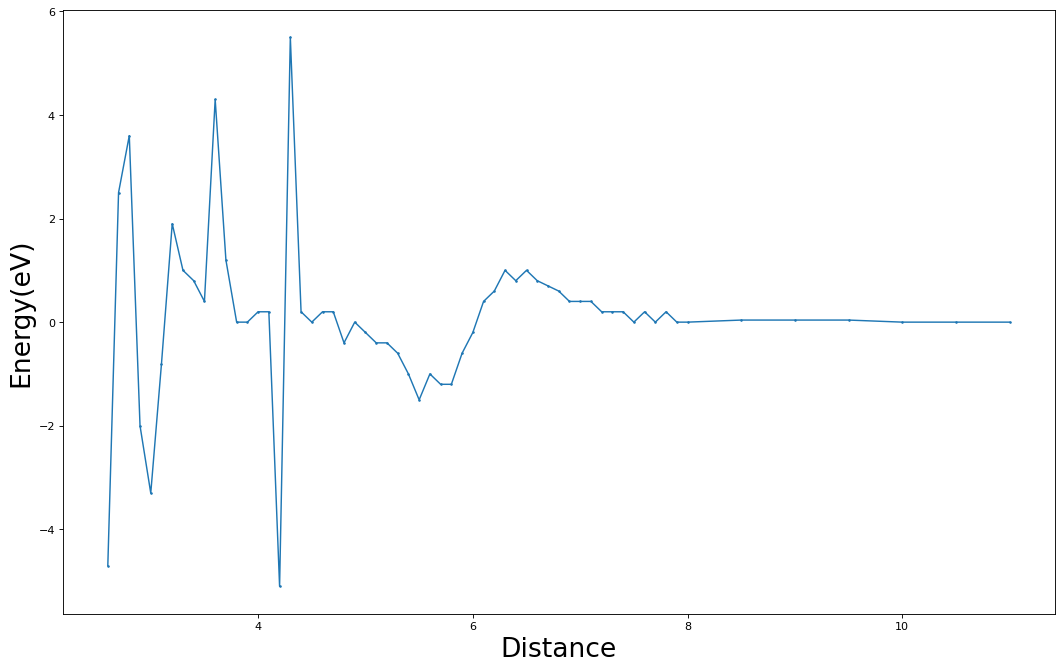

In [40]:
new3_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new3_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new3_df_5 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Energy': [(global_name_cut_1[cc+1]['Energy'] - \
                global_name_cut_1[cc]['Energy'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new3_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new3_df_5, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

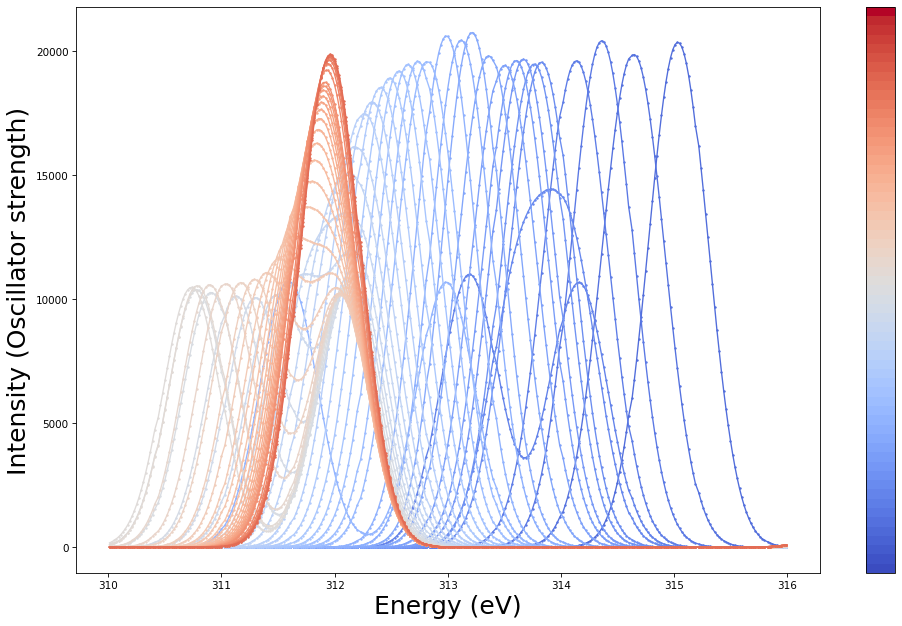

In [41]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=310, xmax=316)

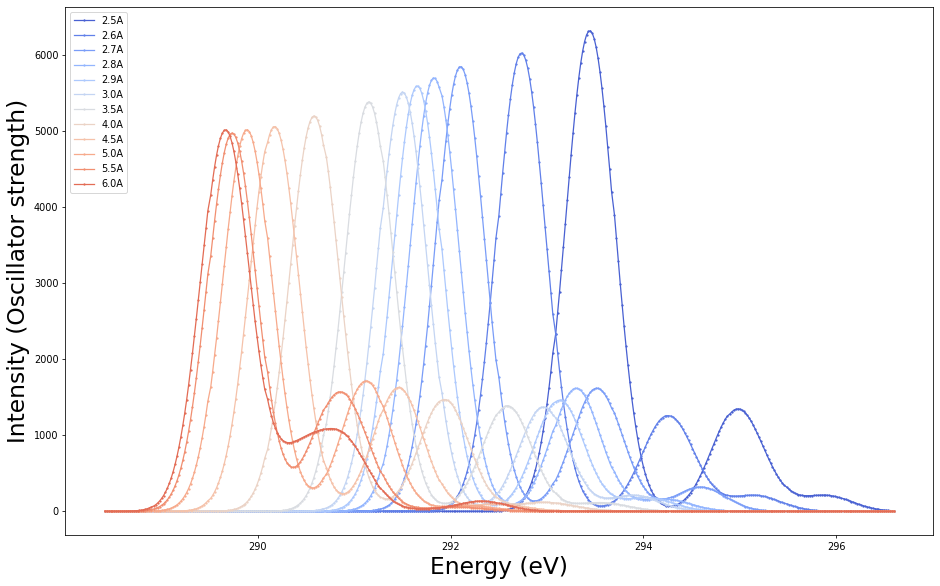

In [42]:
list_shorter = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60]
global_name = [globals()['fy_%s' % str(ii)] for ii in list_shorter] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_shorter] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_shorter, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.4, xmax=296.6)

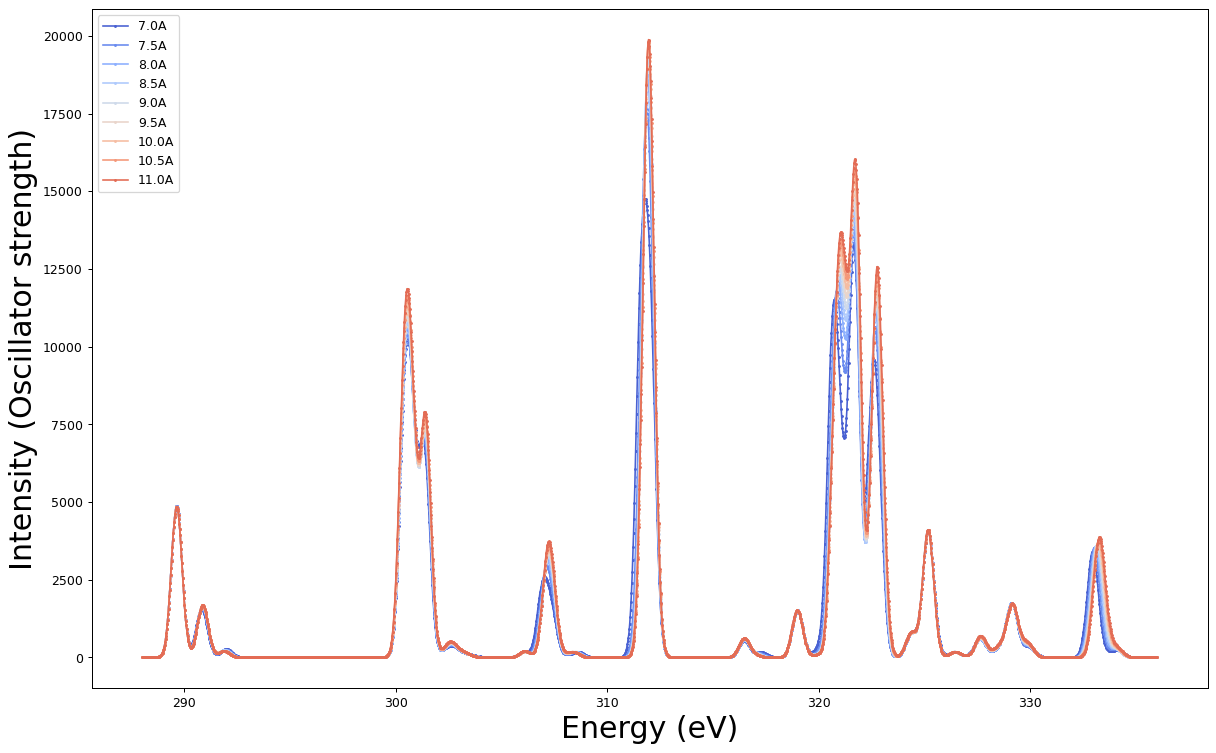

In [43]:
list_suf_longer = [70, 75, 80, 85, 90, 95, 100, 105, 110]
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_longer] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_longer] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_longer, 'Energy', 'Intensity', label_name, dpi=90, \
          xlmt=True, xmin=288, xmax=336)

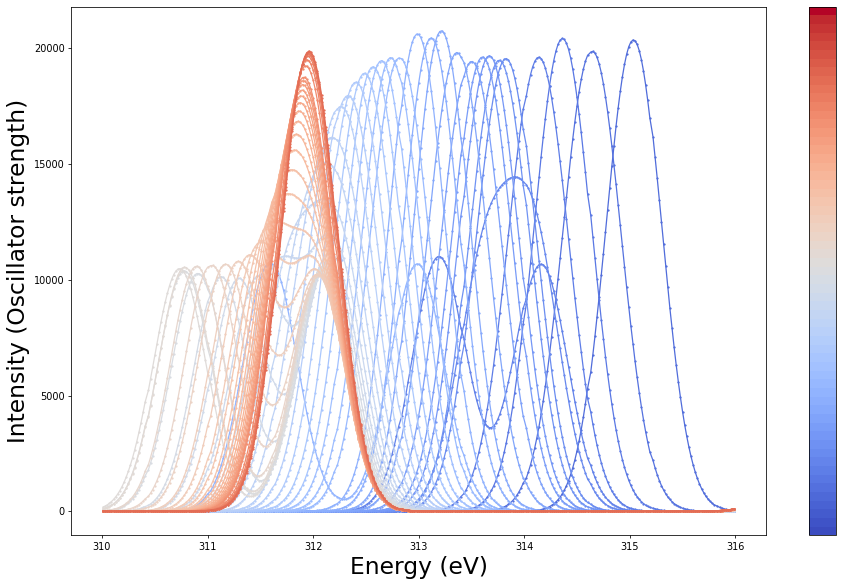

In [44]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=70,\
         xlmt=True, xmin=310, xmax=316)

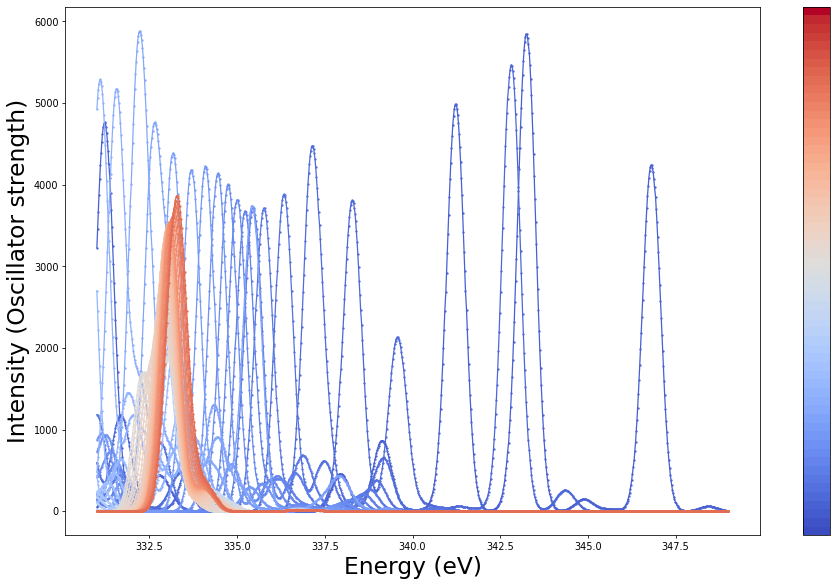

In [45]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=70,\
         xlmt=True, xmin=331, xmax=350)

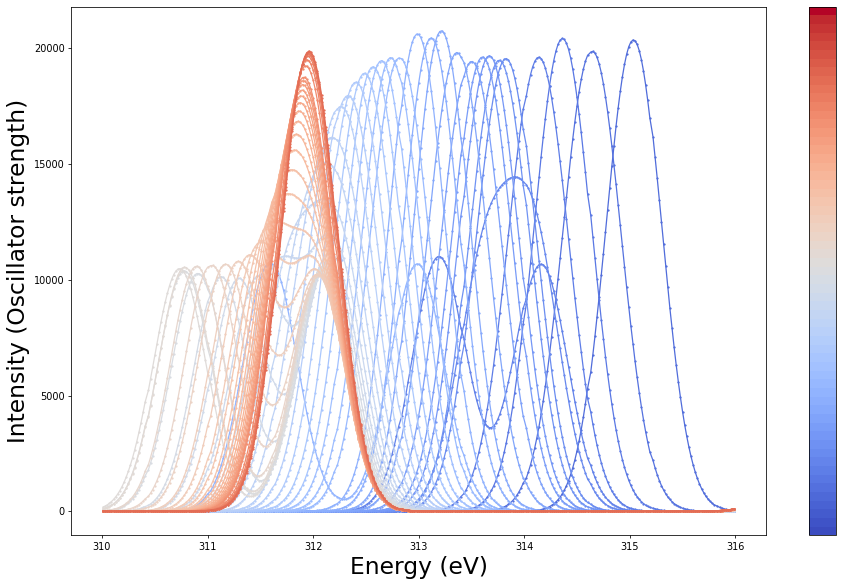

In [46]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=70,\
         xlmt=True, xmin=310, xmax=316)

In [47]:
list_suf = [i for i in range(30,67)]

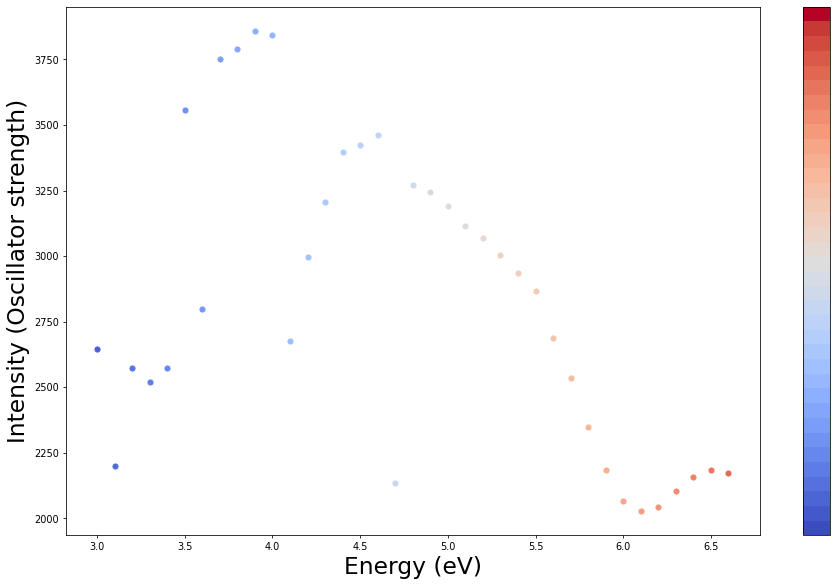

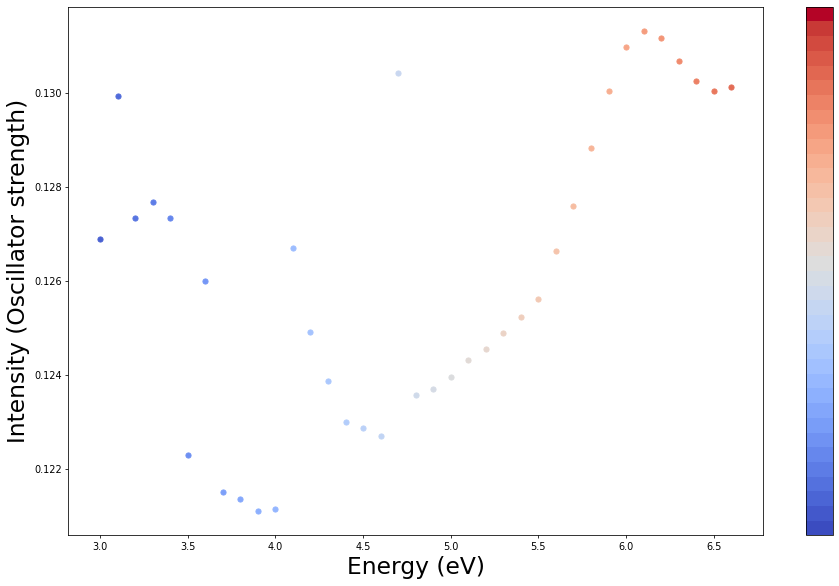

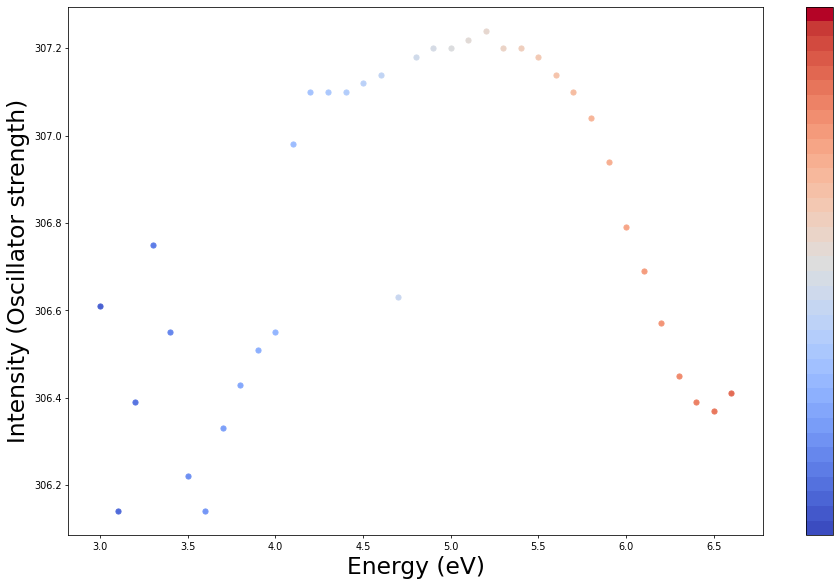

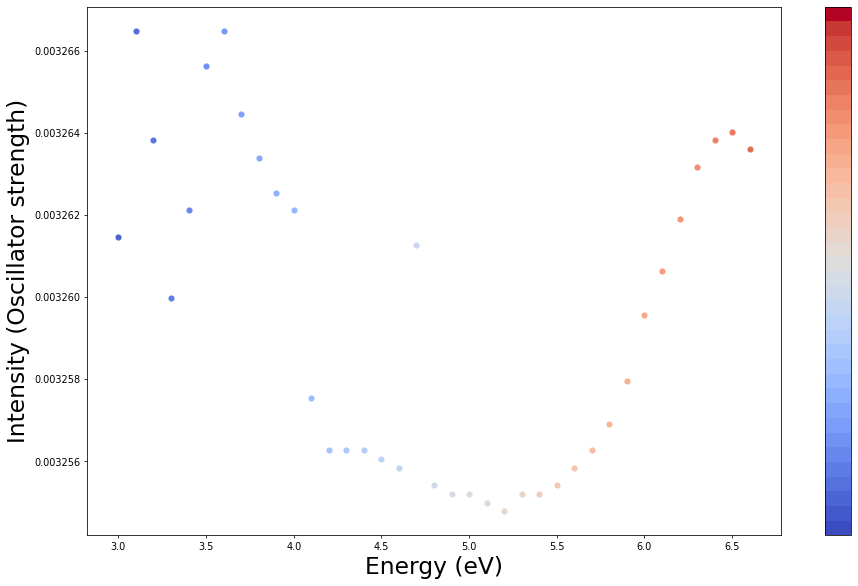

In [48]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one
# 'Energy': [1/math.log(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one

new_df_6 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy']+(1/global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

neww_df = [new_df.iloc[ii] for ii in range(len(list_suf))]
neww_df_2 = [new_df_3.iloc[ii] for ii in range(len(list_suf))]
neww_df_3 = [new_df_4.iloc[ii] for ii in range(len(list_suf))]
neww_df_4 = [new_df_5.iloc[ii] for ii in range(len(list_suf))]
#neww_df_5 = [new_df_6.iloc[ii] for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(neww_df, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_2, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_3, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_4, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
#plot_alot_xray(neww_df_5, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)

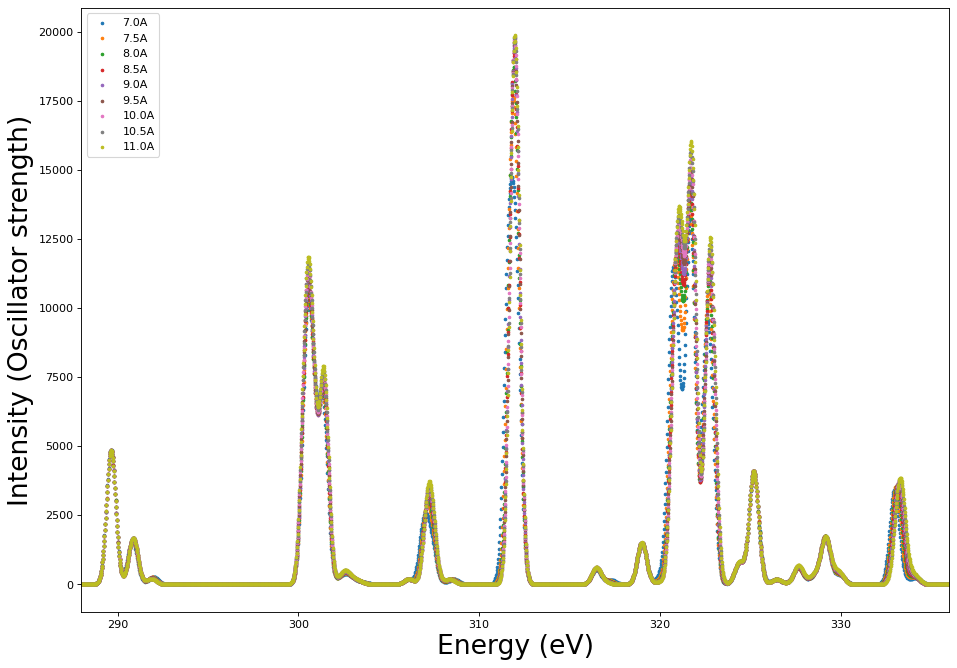

In [49]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)

for ii in list_suf_longer:
    n2.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([288,336])
plt.show()

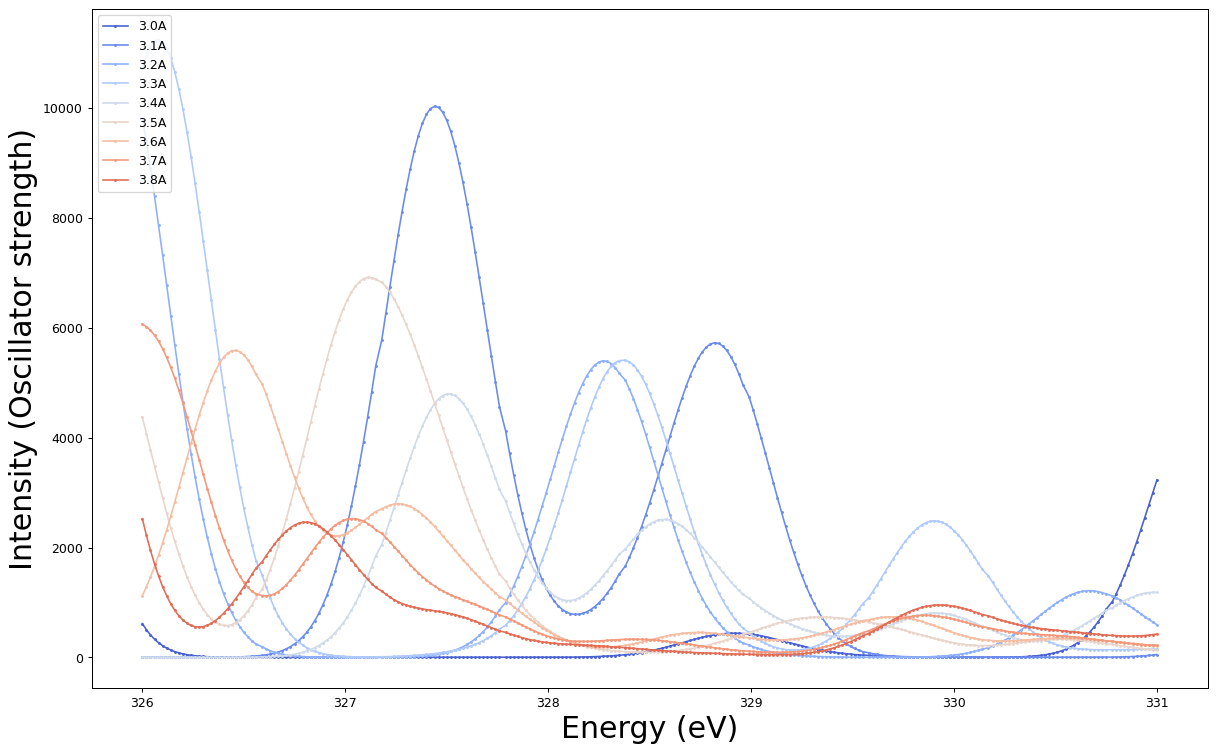

In [50]:
plot_xray(global_name, list_suf_longer, 'Energy', 'Intensity', label_name, dpi=90, \
          xlmt=True, xmin=326, xmax=331)

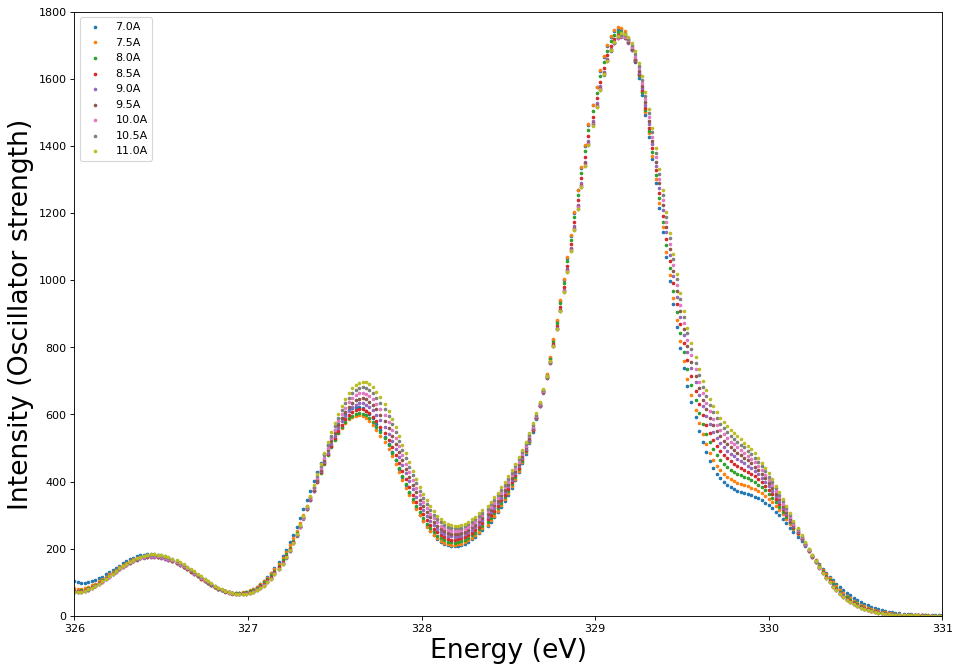

In [51]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)

for ii in list_suf_longer:
    n2.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
#plt.xlim([289,290.3]) #no changes
#plt.ylim([0,5000])
#second peak
#plt.xlim([290.3,291.5]) #no changes (~200 intensity units changes)
#plt.ylim([0,1700])
#third peak
#plt.xlim([299.5,302.3]) #changes! (~2000 intensity units changes)
#plt.ylim([0,12500])
#fourth peak
#plt.xlim([305.5,309]) #changes! (~1000 intensity units changes)
#plt.ylim([0,4000])
#fifth peak
#plt.xlim([310.7,313]) #changes! (~5000 intensity units changes)
#plt.ylim([0,21000])
#sixth peak
#plt.xlim([315.5,318]) #no changes (~100 intensity units changes)
#plt.ylim([0,650])
#seventh peak
#plt.xlim([318.2,319.6]) #no changes
#plt.ylim([0,1700])
#eighth peak
#plt.xlim([319.7,323.7]) #changes (~5000 intensity units changes)
#plt.ylim([0,17000])
#ninth peak
#plt.xlim([323.8,326]) #no changes
#plt.ylim([0,4500])
#tenth peak
plt.xlim([326,331]) #no changes (~100 intensity units changes)
plt.ylim([0,1800])
#eleventh peak
#plt.xlim([332,335]) #no changes (~100 intensity units changes)
#plt.ylim([0,4000])
#twelfth peak
#plt.xlim([336,338]) #no changes (~10 intensity units changes)
#plt.ylim([0,50])
plt.show()

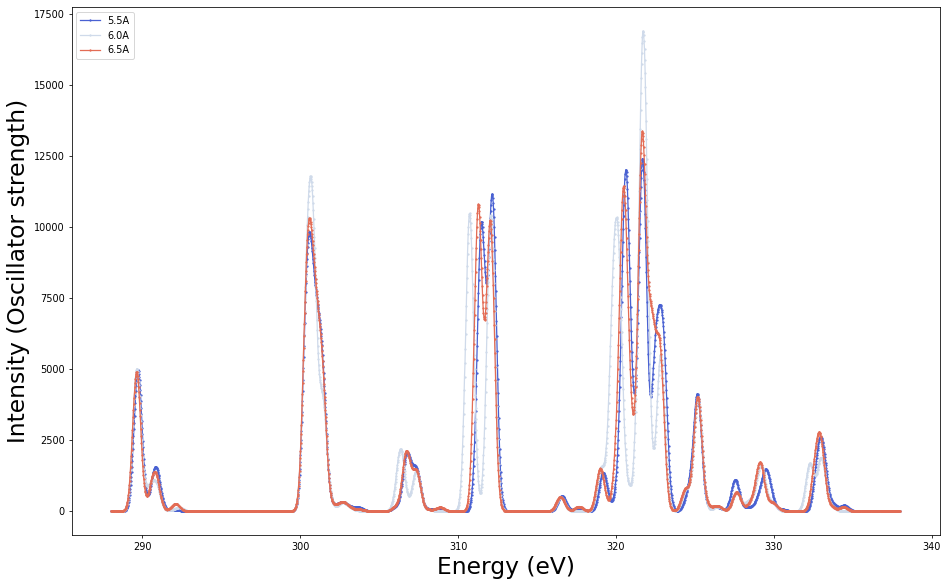

In [52]:
list_suf_middle = [55, 60, 65]
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_middle] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_middle] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_middle, 'Energy', 'Intensity', label_name, dpi=70, \
          xlmt=True, xmin=288, xmax=338)

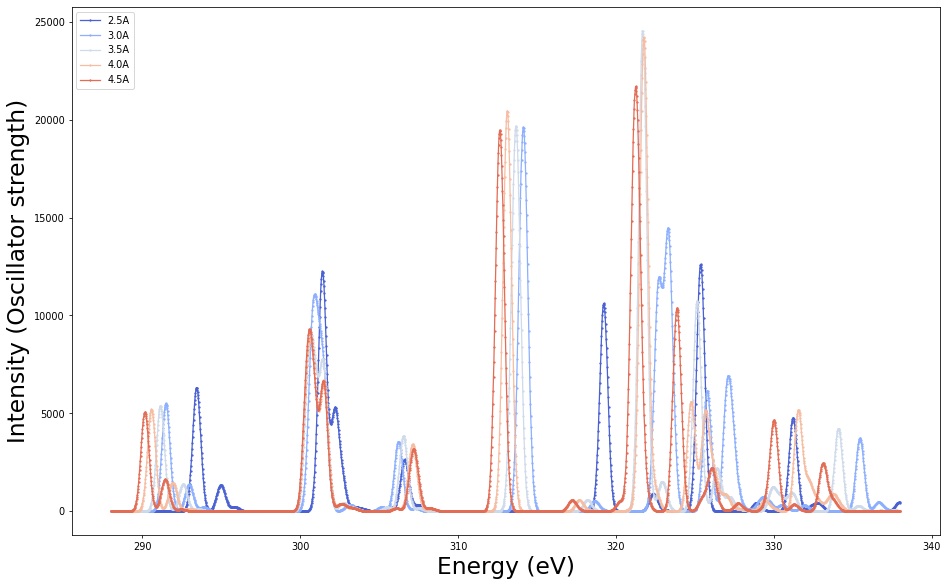

In [53]:
list_suf_short = [25, 30, 35, 40, 45]#[30, 35, 40, 45, 50]#[25,
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_short] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_short] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_short, 'Energy', 'Intensity', label_name, dpi=70, \
          xlmt=True, xmin=288, xmax=338)

### First section
#### First and second peaks

In [54]:
list_suf_short1 = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 50, 55, 60, 65]
list_suf_long1 = [60, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 80, 85, 90, 95, 100, 105, 110]

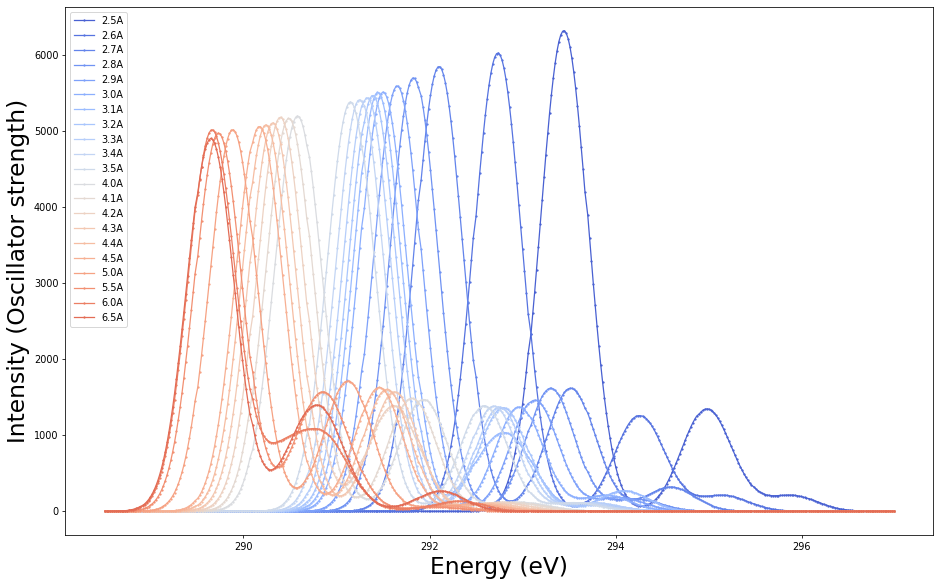

In [55]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_short1] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_short1] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_short1, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.5, xmax=297)

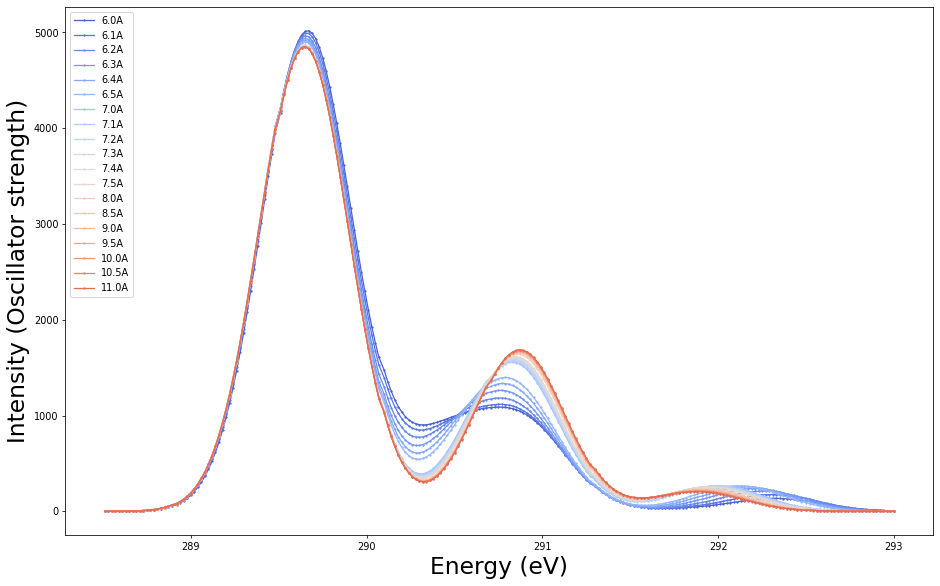

In [56]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_long1] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_long1] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_long1, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.5, xmax=293)

In [57]:
fy_30[['Energy','Intensity']][0:400].max()

Energy        296.14000
Intensity    5512.88573
dtype: float64

### Second section
#### Third peak

In [58]:
list_suf_short2 = [i for i in range(25,41)]
list_suf_middle2 = [i for i in range(30,66)]
list_suf_long2 = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

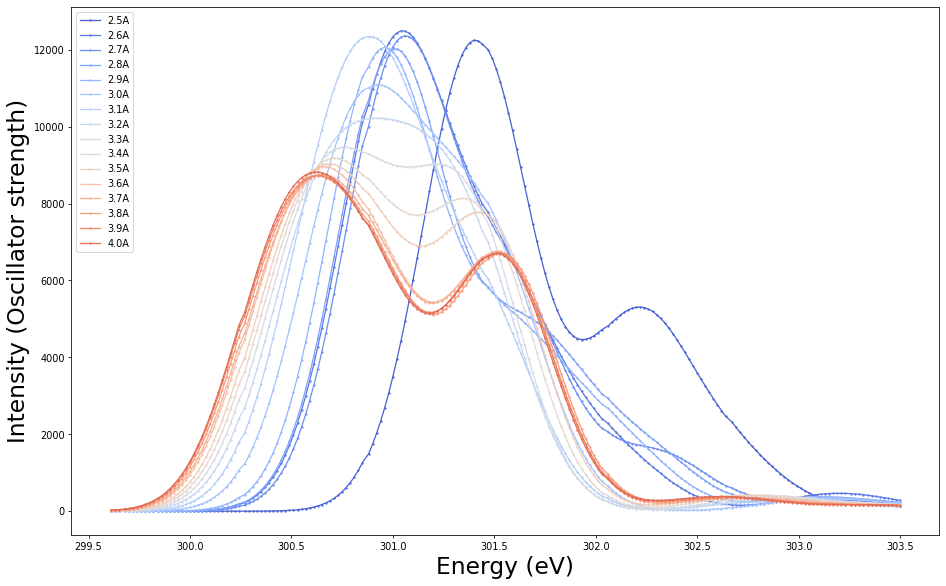

In [59]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_short2] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_short2] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_short2, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=299.6, xmax=303.5)

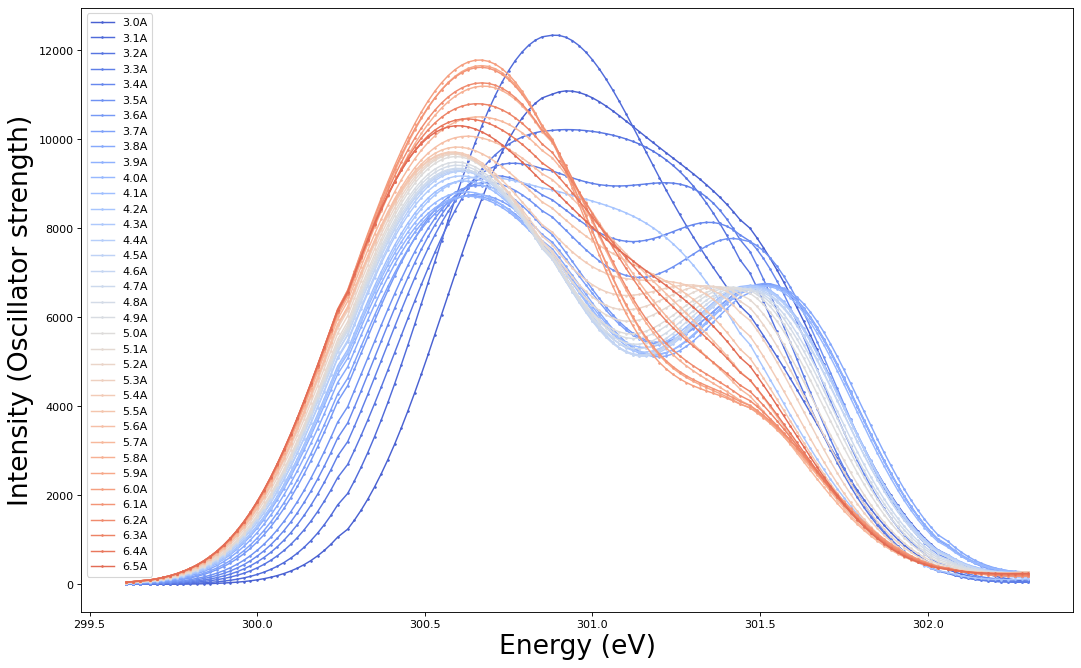

In [60]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_middle2] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_middle2] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_middle2, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=299.6, xmax=302.3)

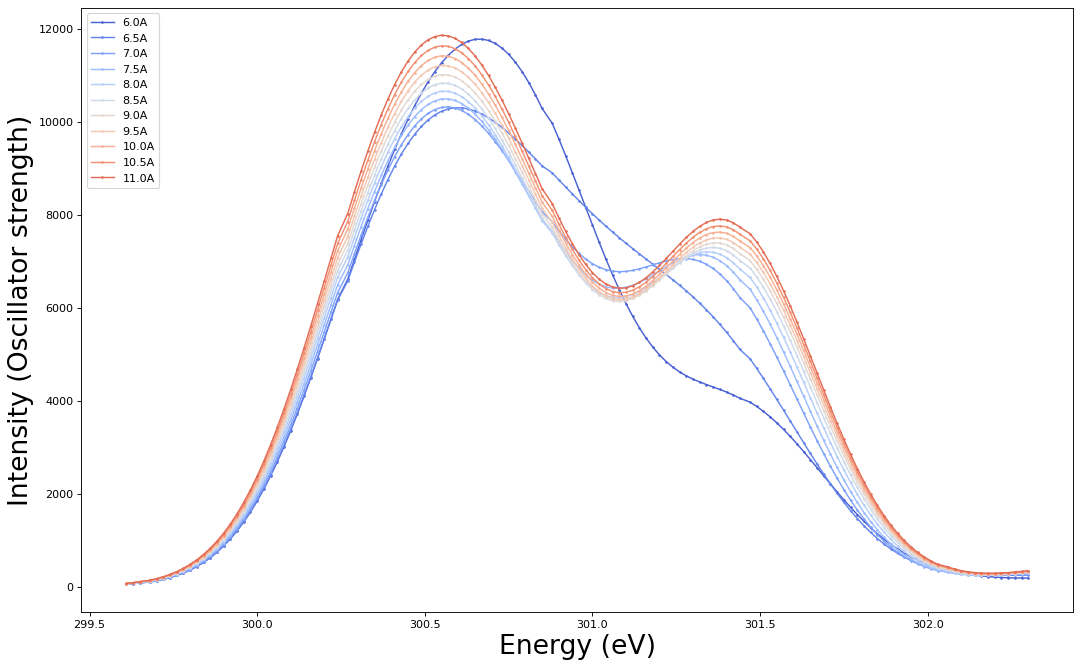

In [61]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_long2] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_long2] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_long2, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=299.6, xmax=302.3)

### Third section
#### Fourth peak

In [62]:
list_suf_shorter3 = [26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
list_suf_short3 = [30, 35, 40, 45, 50]
list_suf_outlier3 = [25, 55, 60]
list_suf_long3 = [i for i in range(65,81)]
tmp = [85, 90, 95, 100, 105, 110]
for i in l_tmp:
    list_suf_long3.append(i)

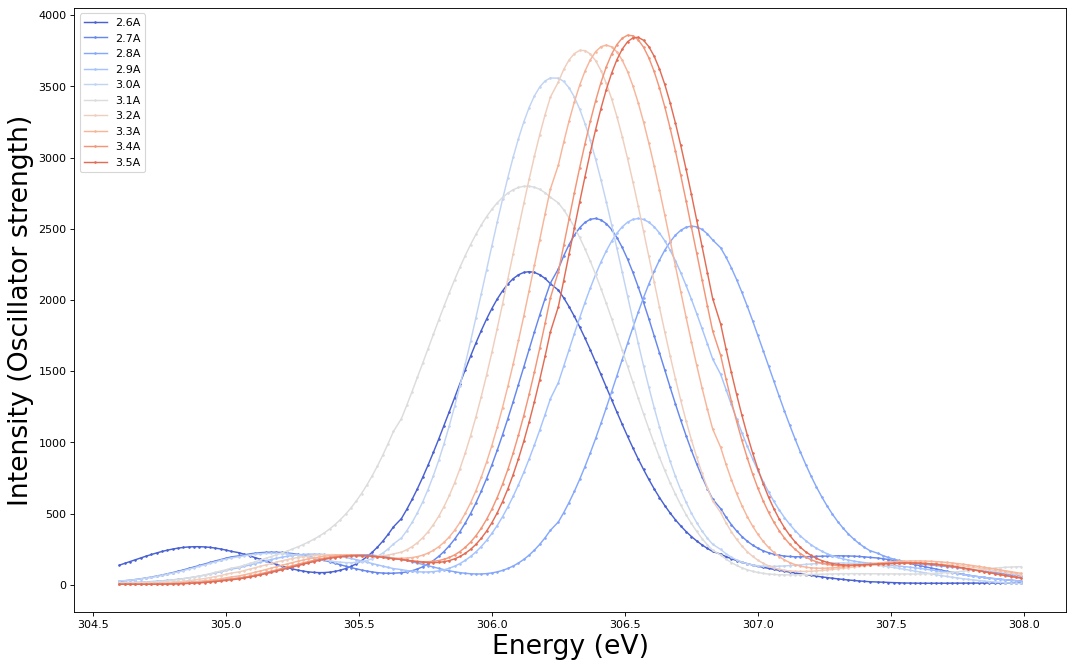

In [63]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_shorter3] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_shorter3] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_shorter3, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=304.6, xmax=308)

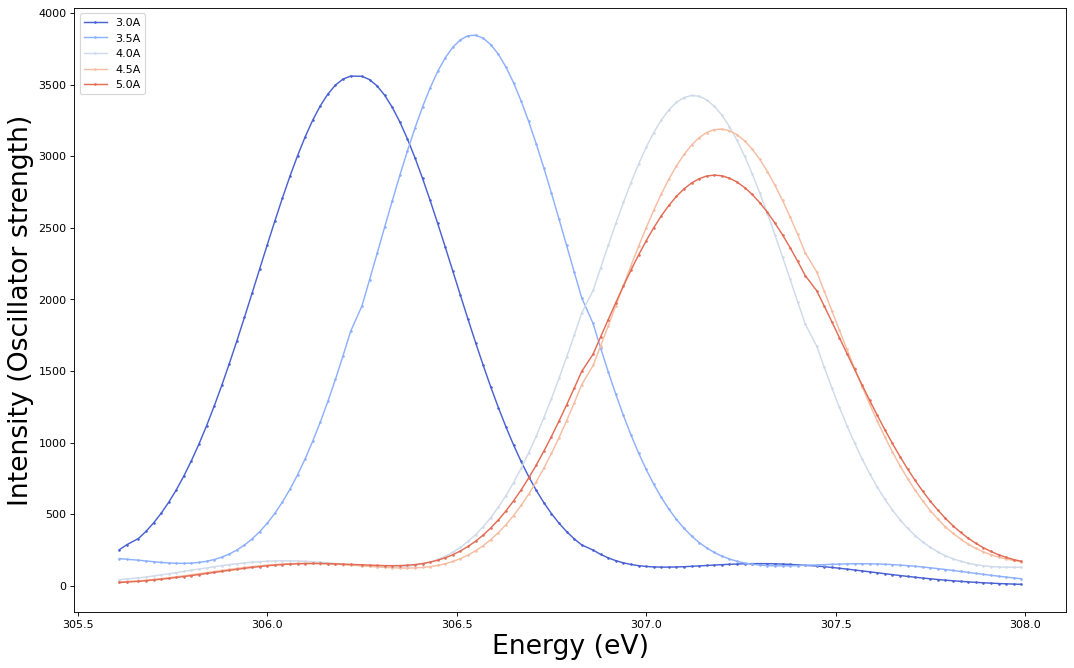

In [64]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_short3] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_short3] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_short3, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=305.6, xmax=308)

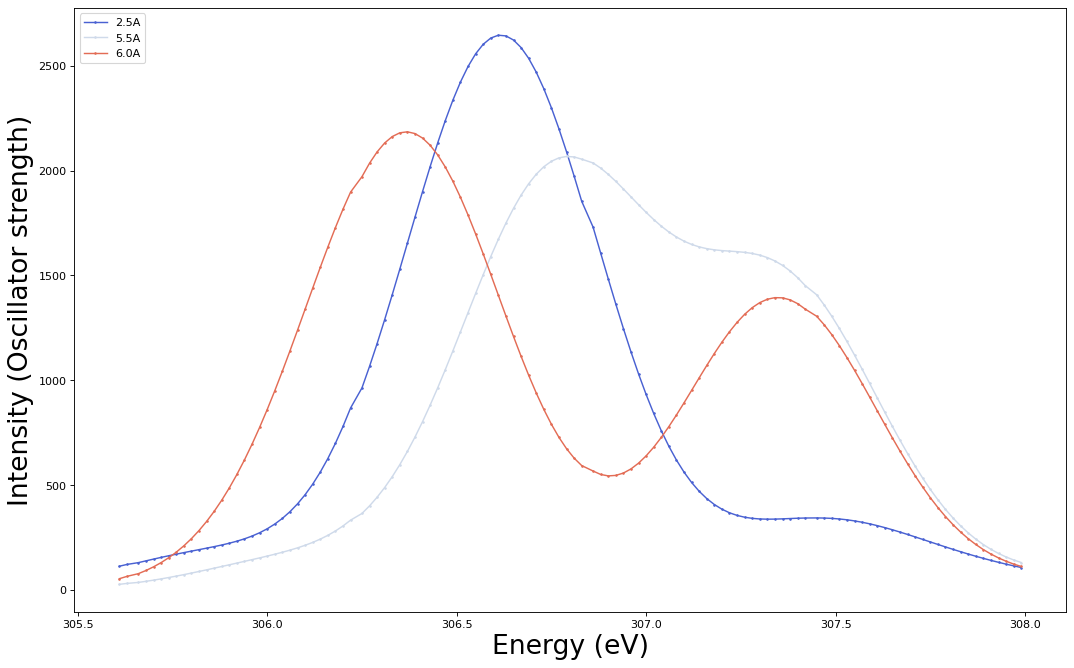

In [65]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_outlier3] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_outlier3] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_outlier3, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=305.6, xmax=308)

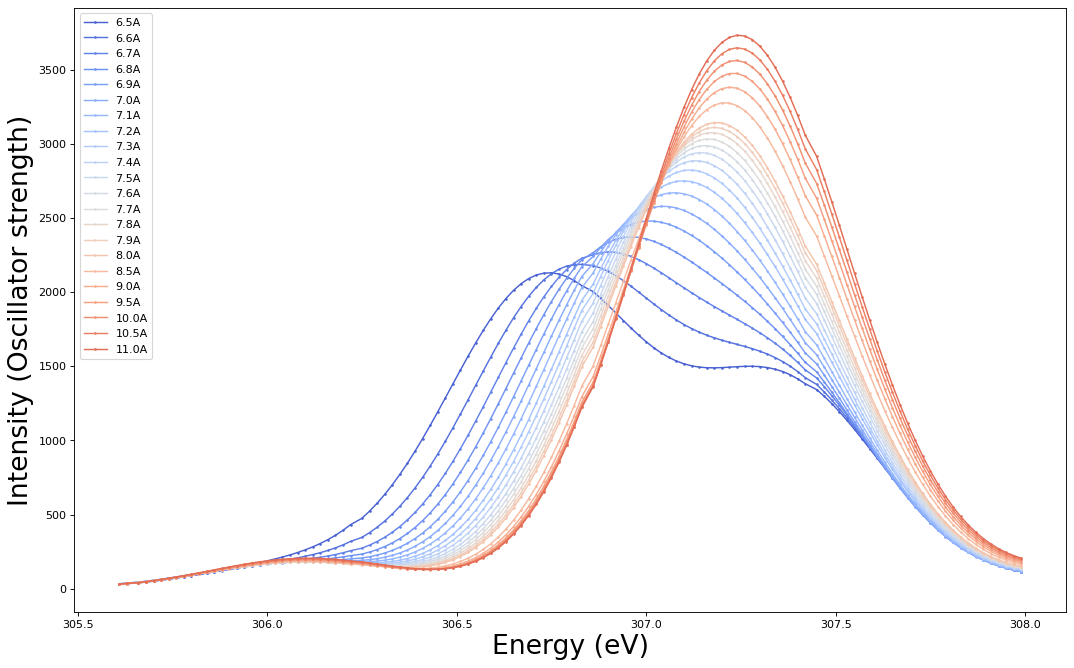

In [66]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_long3] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_long3] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_long3, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=305.6, xmax=308)

### Fourth section
#### Fifth peak

In [67]:
list_suf_short4 = [26, 27, 28, 29, 30, 35, 40, 45, 50, 55]
list_suf_long4 = [55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

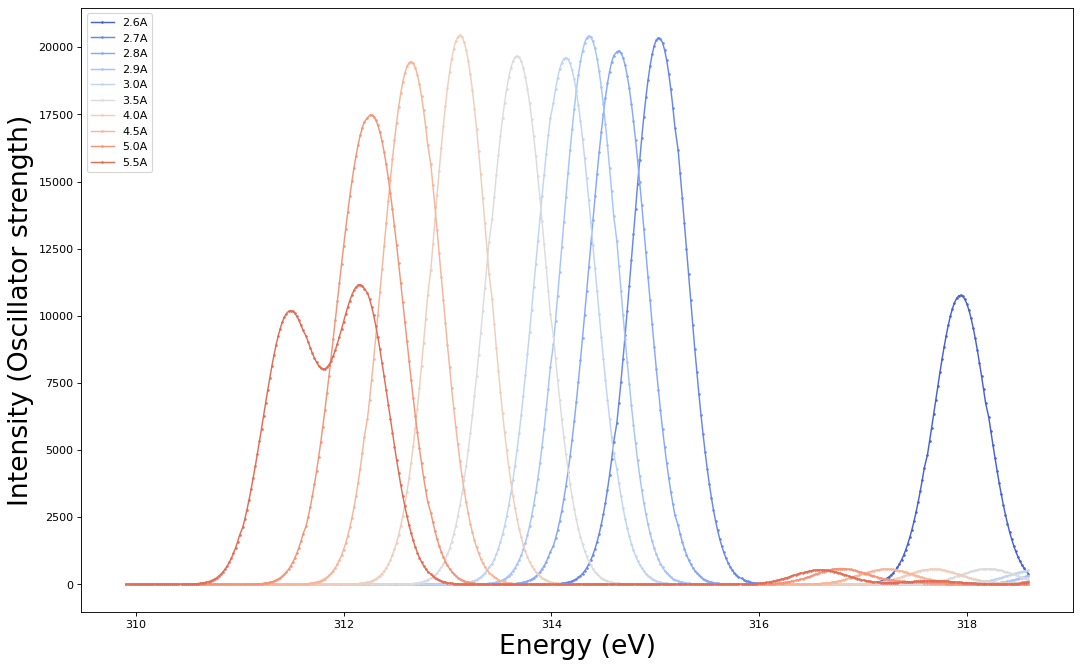

In [68]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_short4] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_short4] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_short4, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=309.9, xmax=318.6)

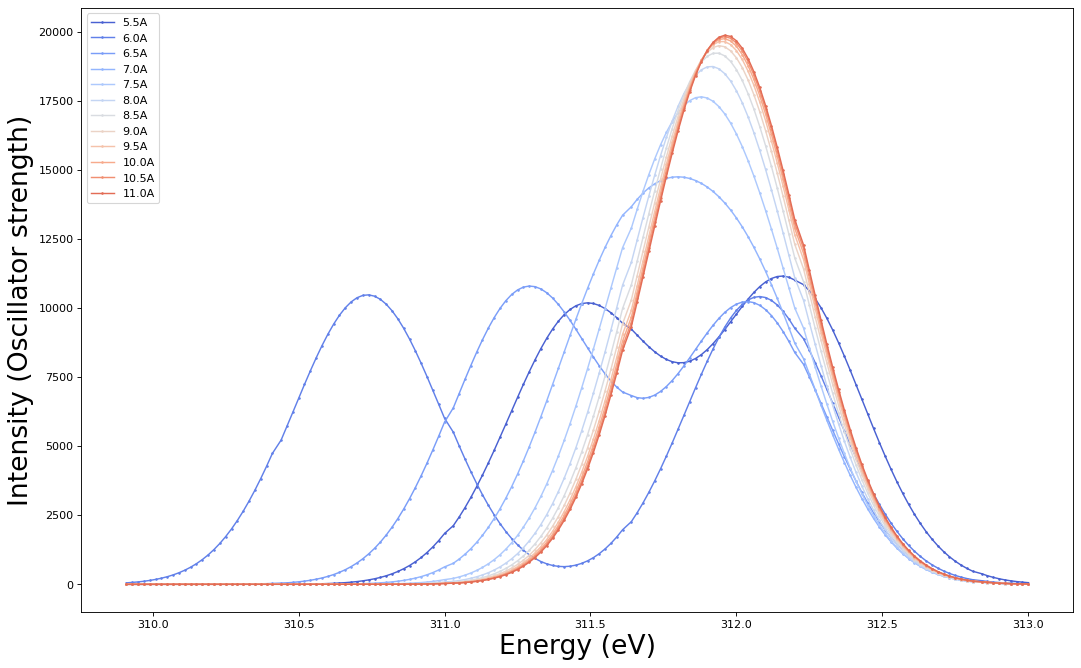

In [69]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_long4] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_long4] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_long4, 'Energy', 'Intensity', label_name, dpi=80,\
         xlmt=True, xmin=309.9, xmax=313)

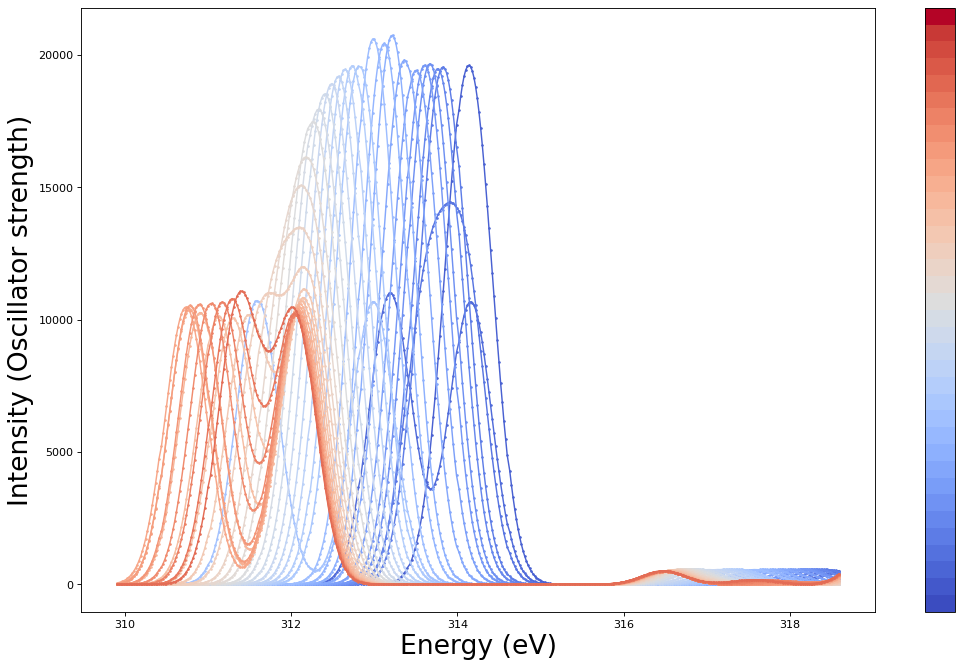

In [70]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] #creating list of label names from pd.data frame diff. names
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=80,\
         xlmt=True, xmin=309.9, xmax=318.6)

### Fifth section
#### sixth and seventh peaks

In [71]:
list_suf_long5 = [27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_outlier5 = [25, 26, 27, 28, 29, 30, 35, 40, 45]

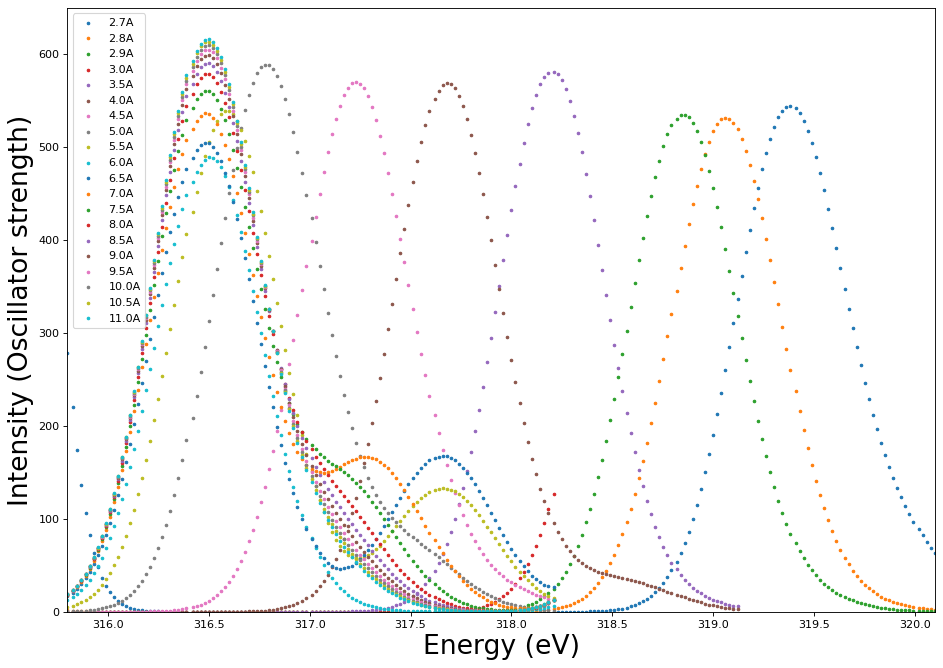

In [72]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long5:
    if ii<30:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1630], globals()['fy_%s' % str(ii)][['Intensity']][:1630], s=5, label=str(ii/10)+'A')
    elif ii<45 and ii>30:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1530], globals()['fy_%s' % str(ii)][['Intensity']][:1530], s=5, label=str(ii/10)+'A')
    else:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1485], globals()['fy_%s' % str(ii)][['Intensity']][:1485], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([315.8,320.1])
plt.ylim([0,650])
#sixth peak
#plt.xlim([315.5,318]) #no changes (~100 intensity units changes)
#plt.ylim([0,650])
#seventh peak
#plt.xlim([318.2,319.6]) #no changes
#plt.ylim([0,1700])
plt.show()

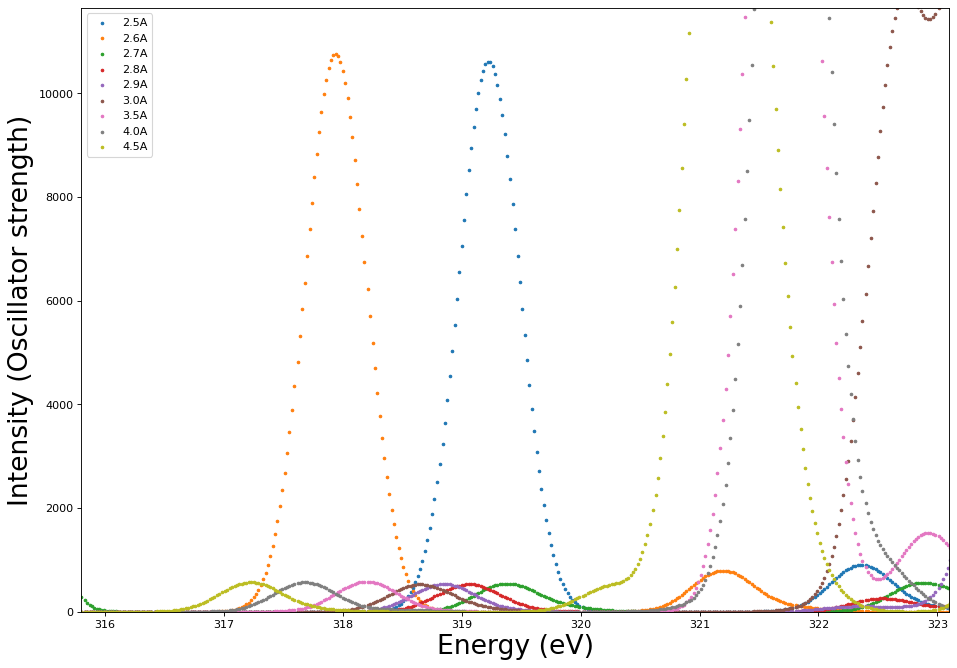

In [73]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier5:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([315.8,323.1])
plt.ylim([0,11650])
plt.show()

### Sixth section
#### eighth and ninth peaks

In [74]:
list_suf_short6 = [35, 40, 45]
list_suf_outlier6 = [25, 26, 27, 28, 29, 30]
list_suf_middle6 = [50, 55, 60]
list_suf_long6 = [65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

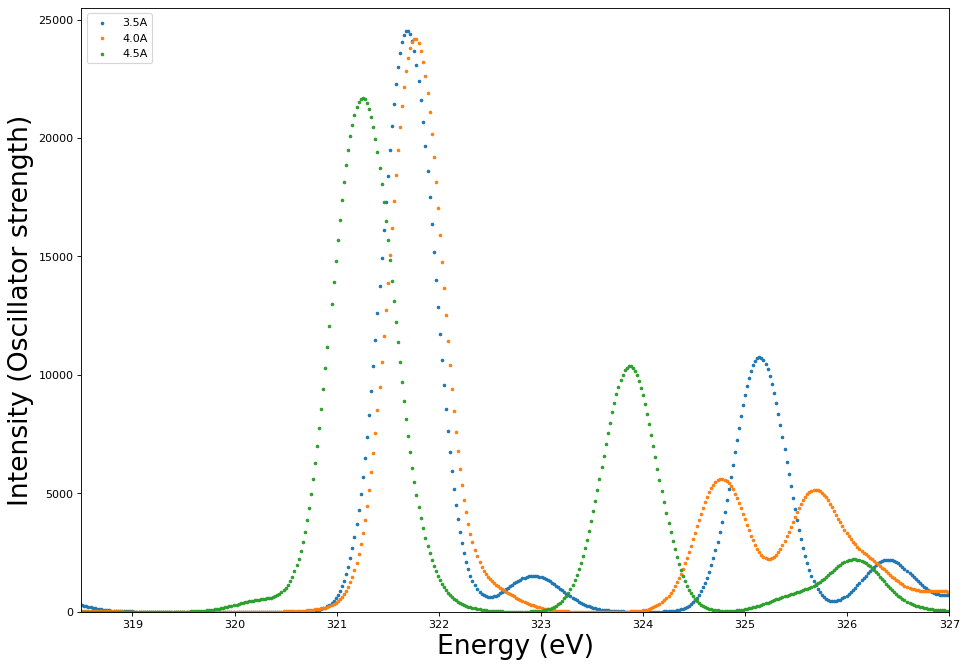

In [75]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')

plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,25500])
#eighth peak
#plt.xlim([319.7,323.7]) #changes (~5000 intensity units changes)
#plt.ylim([0,19000])
#ninth peak
#plt.xlim([323.8,326]) #no changes
#plt.ylim([0,4500])
plt.show()

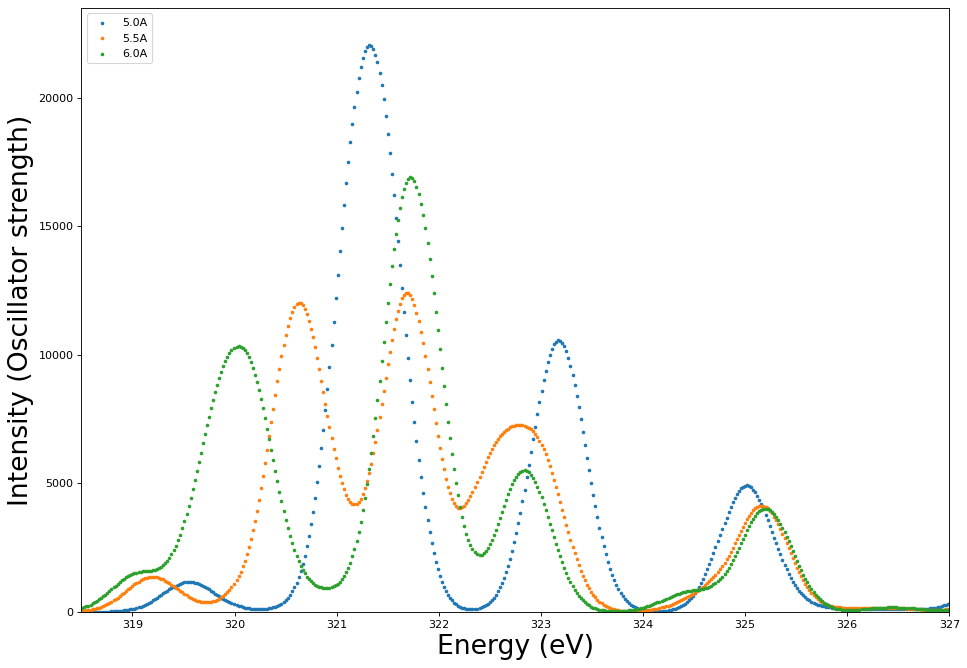

In [76]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,23500])

plt.show()

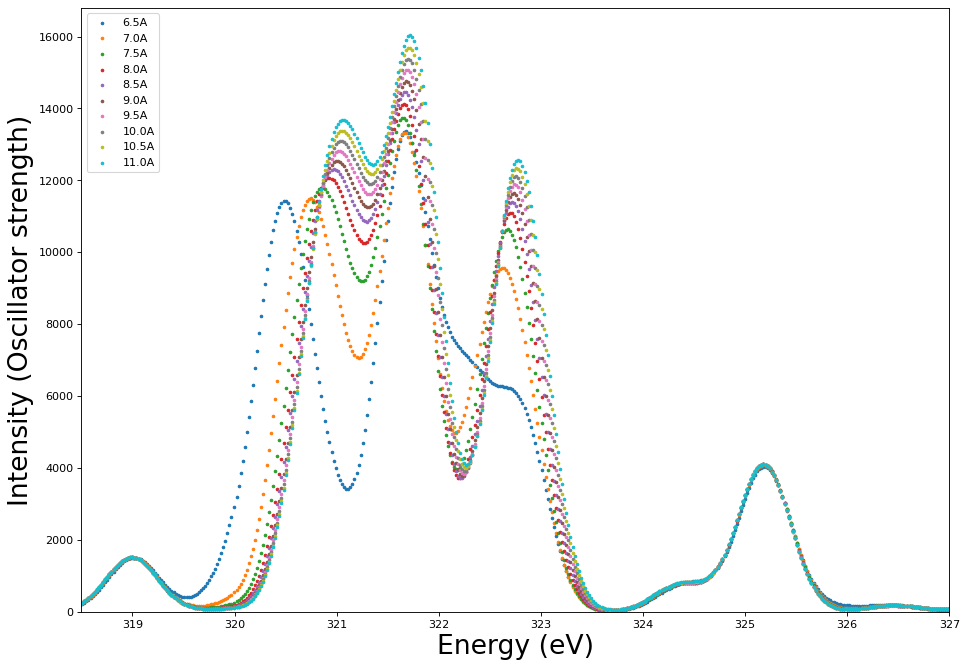

In [77]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,16800])

plt.show()

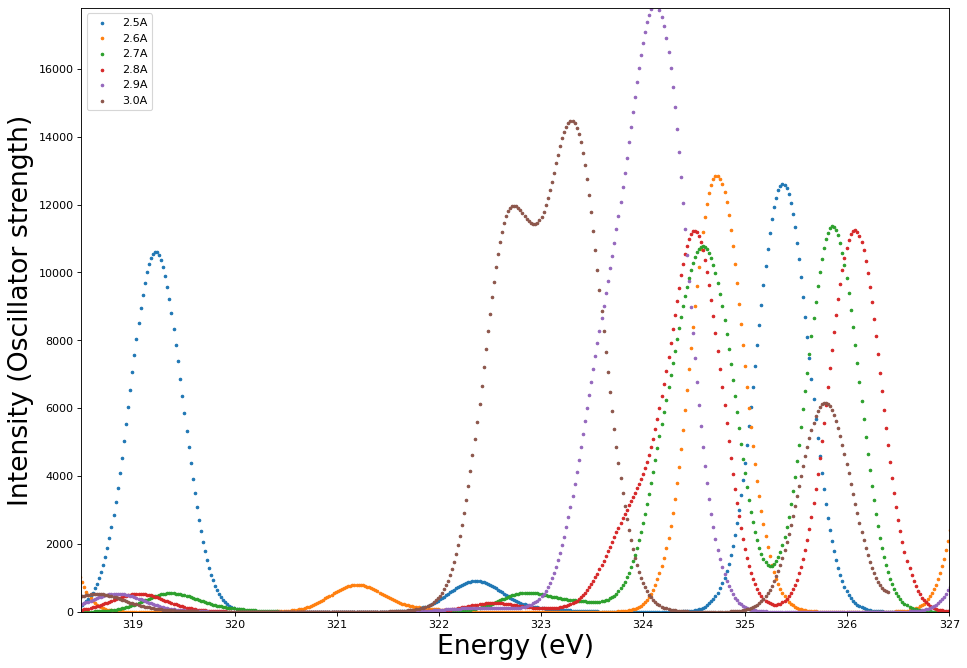

In [78]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier6:
    if 30>ii:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    else:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1888], globals()['fy_%s' % str(ii)][['Intensity']][:1888], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,17800])

plt.show()

### Seventh section
#### tenth peak

In [79]:
list_suf_middle7 = [50, 55, 60, 65]
list_suf_long7 = [65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_outlier7 = [25, 26, 27, 28, 29, 30, 35, 40, 45]

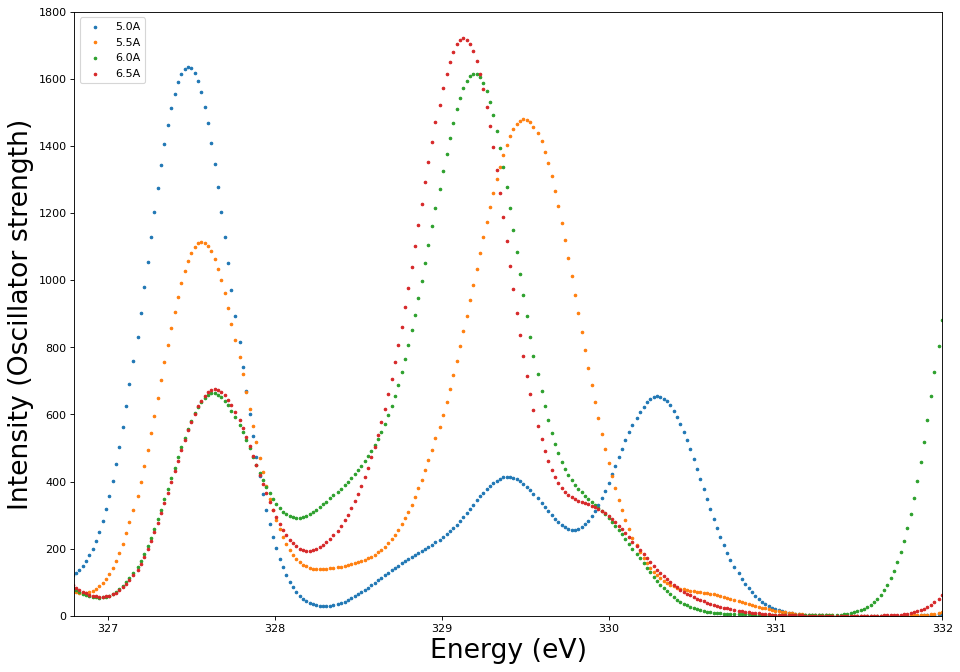

In [80]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle7:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326.8,332])#331
plt.ylim([0,1800])
#tenth peak
#plt.xlim([326,331]) #no changes (~100 intensity units changes)
#plt.ylim([0,1800])
plt.show()

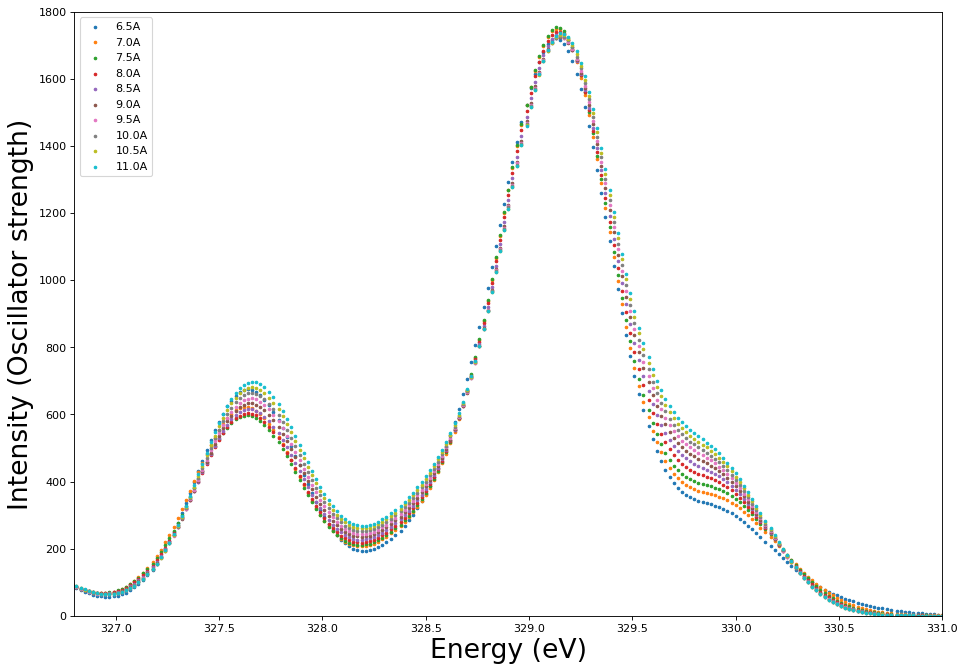

In [81]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long7:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326.8,331])
plt.ylim([0,1800])

plt.show()

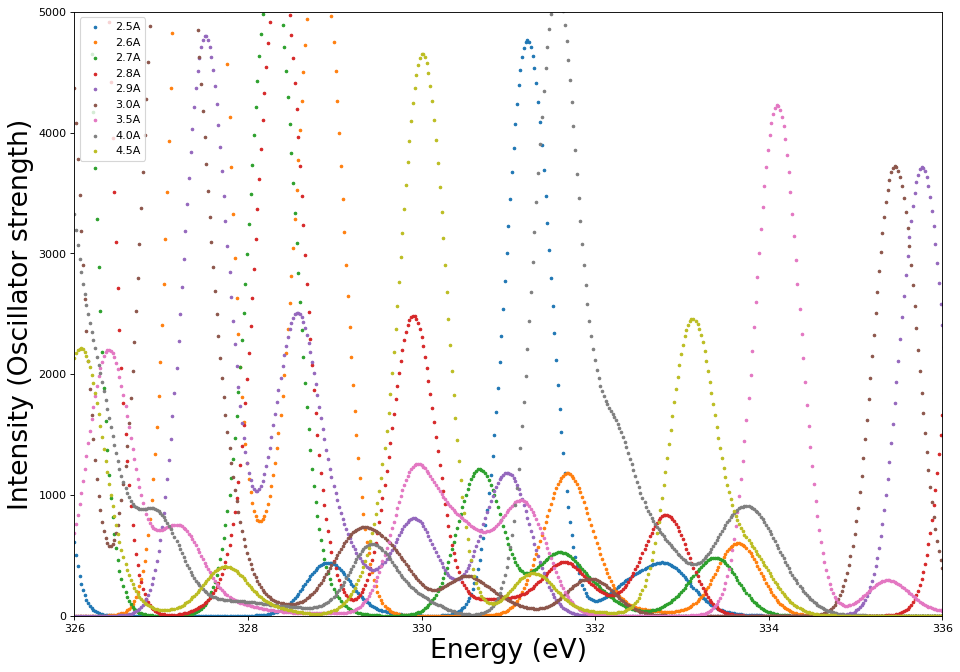

In [82]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier7:
    
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326,336])
plt.ylim([0,5000])

plt.show()

### Eighth section
#### eleventh and twelfth peaks

In [83]:
list_suf_outlier8 = [25, 26, 27, 28, 29, 30, 35, 40, 45]
list_suf_middle8 = [40, 45, 50, 55, 60, 65]
list_suf_long8 = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 80, 85, 90, 95, 100, 105, 110]

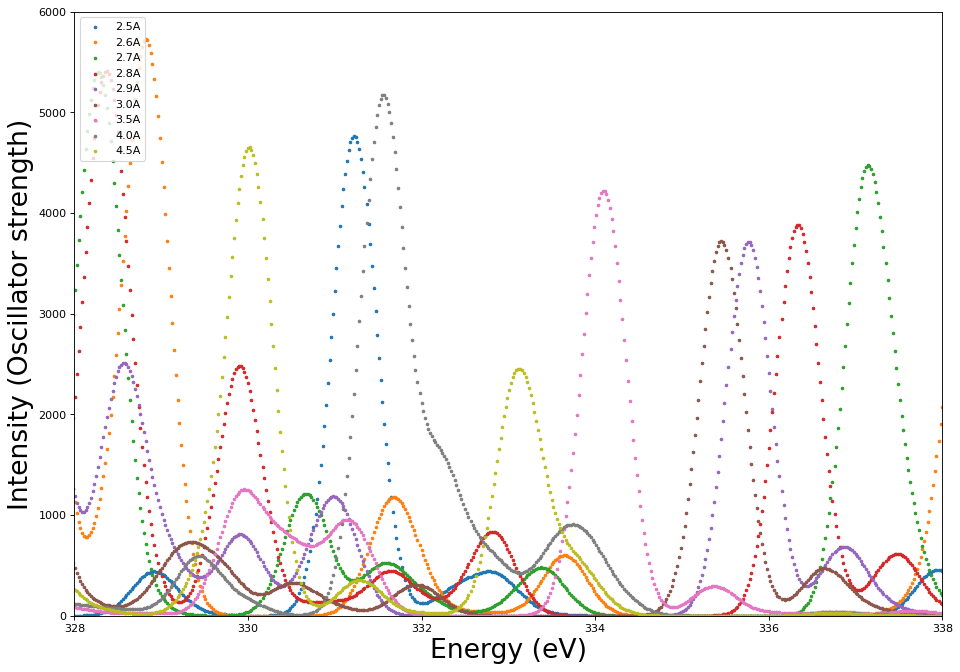

In [84]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([328,338])#348
plt.ylim([0,6000])
#eleventh peak
#plt.xlim([332,335]) #no changes (~100 intensity units changes)
#plt.ylim([0,4000])
#twelfth peak
#plt.xlim([336,338]) #no changes (~10 intensity units changes)
#plt.ylim([0,50])
plt.show()

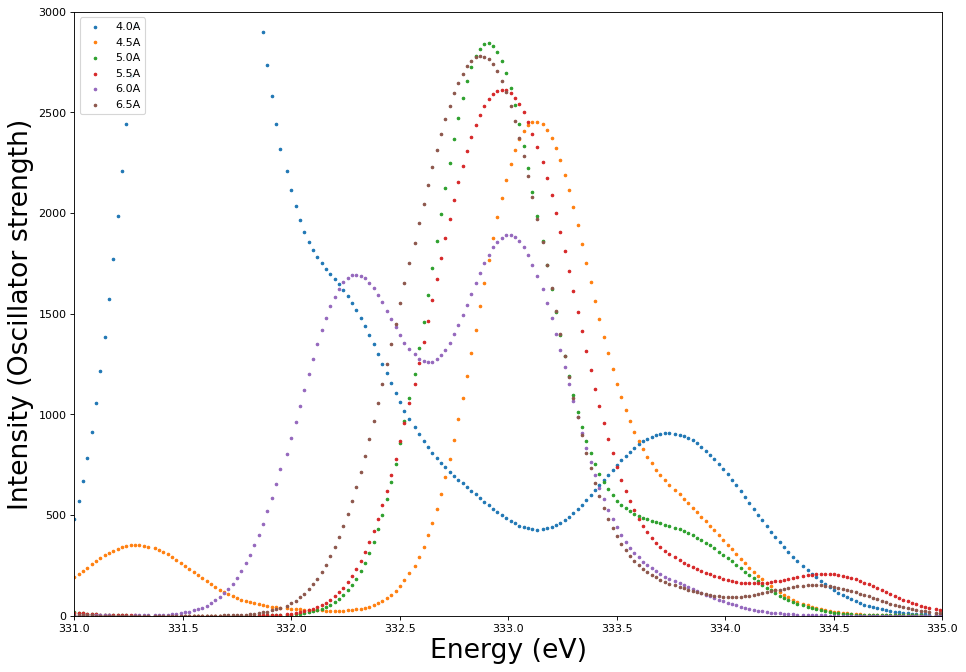

In [85]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([331,335])
plt.ylim([0,3000])

plt.show()

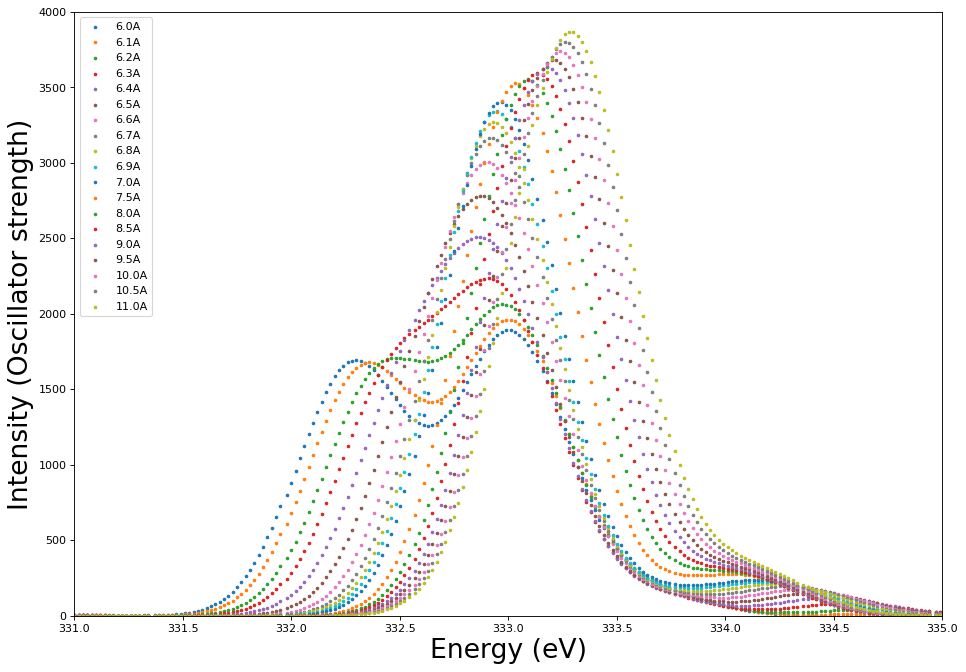

In [86]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([331,335])
plt.ylim([0,4000])

plt.show()

### Relative intensities

In [87]:
max_10fy = g10fy[['Intensity']].max()
max_9fy = g9fgy[['Intensity']].max()
max_8fy = g8fg2y[['Intensity']].max()
max_7fy = g7fg3y[['Intensity']].max()
max_6fy = g6fg4y[['Intensity']].max()
max_5fy = g5fg5y[['Intensity']].max()
max_4fy = g4fg6y[['Intensity']].max()
max_3fy = g3fg7y[['Intensity']].max()
max_2fy = g2fg8y[['Intensity']].max()
max_10f = g10fg[['Intensity']].max()
max_10y = g11y[['Intensity']].max()

NameError: name 'g10fy' is not defined

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g10fy[['Energy']],g10fy[['Intensity']]/max_10fy, s=5, label='G10FY')
n2.scatter(g9fgy[['Energy']],g9fgy[['Intensity']]/max_9fy, s=5, label='G9FGY')
#n2.scatter(g8fg2y[['Energy']],g8fg2y[['Intensity']]/max_8fy, s=5, label='G8FG2Y')
n2.scatter(g7fg3y[['Energy']],g7fg3y[['Intensity']]/max_7fy, s=5, label='G7FG3Y')
#n2.scatter(g6fg4y[['Energy']],g6fg4y[['Intensity']]/max_6fy, s=5, label='G6FG4Y')
n2.scatter(g5fg5y[['Energy']],g5fg5y[['Intensity']]/max_5fy, s=5, label='G5FG5Y')
#n2.scatter(g4fg6y[['Energy']],g4fg6y[['Intensity']]/max_4fy, s=5, label='G4FG6Y')
#n2.scatter(g3fg7y[['Energy']],g3fg7y[['Intensity']]/max_3fy, s=5, label='G3FG7Y')
#n2.scatter(g2fg8y[['Energy']],g2fg8y[['Intensity']]/max_2fy, s=5, label='G2FG8Y')

plt.xlabel('Energy (eV)')
plt.ylabel('Relative intensity')
plt.legend(loc='upper left');
plt.xlim([283.5,291])
plt.show()

In [ ]:
#Uncomment the original range to see more peaks outside the expected range
file="w.02/"
post=".csv"
g10py_02 = pd.read_csv(file+'G10PY'+post, delimiter=',')
g10py_01 = pd.read_csv(file+'G10PY_1'+post, delimiter=',')
g10py_005 = pd.read_csv(file+'G10PY_05'+post, delimiter=',')
g10py_001 = pd.read_csv(file+'G10PY_01'+post, delimiter=',')

g10py_02.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_01.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_005.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_001.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g10py[['Energy']],g10py[['Intensity']], s=5, label='G10PY')
#n2.scatter(g10py_02[['Energy']],g10py_02[['Intensity']], s=5, label='G10PY w 0.2')
#n2.scatter(g10py_01[['Energy']],g10py_01[['Intensity']], s=5, label='G10PY w 0.1')
#n2.scatter(g10py_005[['Energy']],g10py_005[['Intensity']]/1, s=5, label='G10PY w 0.05')
#n2.scatter(g10py_001[['Energy']],g10py_001[['Intensity']]/1, s=5, label='G10PY w 0.01')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#plt.xlim([289.5,289.9])
plt.show()